<a href="https://colab.research.google.com/github/sirius70/NLP_HW4/blob/main/IE7275_Module3_Part1_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IE7275 Data Mining in Engineering**
### -- STUDENT VERSION --

---
#### **Guidelines for Completing and Submitting This Notebook**

Please follow these instructions carefully. Completing all parts of this notebook is required to receive full credit:

#### **You must:**
- **Answer all questions** and reflection tasks using your own words.
- **Summarize every reflection task** clearly and completely.
- **Fill out all missing code cells** — do not leave any code blocks empty.
- **Run your notebook** to ensure that all outputs and visualizations are generated and visible.
- **Convert your completed notebook** to **PDF** or **HTML** format before submission.
- **Submit the file to Canvas** before the deadline.

#### **Academic Integrity Reminder**:
- You must complete this notebook individually.
- Do not copy answers or code from classmates, online sources, or use tools like **ChatGPT** or other **AI writing or code generation tools**.
- Keep in mind that if you use such tools, your answer may be **identical or highly similar** to others who do the same — in this case, we will treat it as copying and apply a **50% penalty** to your assignment grade.

By submitting this notebook, you confirm that all work is your own and that you have followed these guidelines.


---



## **Module 3: Data Preprocessing and Cleaning (Part 1)**

Before building any machine learning model, raw datasets must be transformed into clean, structured, and model-ready forms. This module focuses on preparing data to improve the performance, accuracy, and stability of downstream algorithms.

In this module, you will explore a wide range of data preprocessing tasks, including handling missing values, detecting outliers, encoding categorical variables, scaling numerical features, and engineering new features. You will also learn how to reduce dataset dimensionality, manage class imbalance, and work with different data types such as text and time series.

The goal is to develop a strong foundation in practical data cleaning and transformation techniques — both manual and automated — using Python libraries like Pandas and scikit-learn. By the end of this module, you will be able to design robust preprocessing pipelines that improve the quality of your input data and lead to better models.


---
#### **Module 3.1: Introduction to Data Preprocessing**

Raw data is rarely clean or ready for machine learning. Real-world datasets often contain missing values, errors, outliers, inconsistent formatting, and mixed data types. Data preprocessing is the essential step of transforming this raw data into a structured and reliable format for analysis and modeling.

In this sub-module, you'll learn the importance of data preprocessing and understand its role in the machine learning pipeline. Good preprocessing improves model accuracy, stability, and generalization. Poorly preprocessed data, on the other hand, can lead to misleading insights and unstable models.

**Common goals of data preprocessing:**
- Clean and correct data inconsistencies and errors.
- Standardize and scale features to ensure uniformity.
- Encode categorical variables so they can be used in numerical models.
- Handle missing values, outliers, and skewed distributions.
- Construct new features or reduce dimensionality for efficiency.

By the end of this module, you’ll be able to build preprocessing pipelines that are reproducible, scalable, and ready for real-world deployment.

---

#### **Exercise 1: Why Clean Data Matters**

In this exercise, you will explore how unclean data can affect analysis by working with a raw dataset that contains common real-world issues such as missing values, incorrect data types, duplicated rows, extra whitespace in strings, and inconsistent categorical labels. You will then apply basic cleaning techniques — including removing duplicates, handling missing values, converting data types, and standardizing category formats — to transform it into a structured and usable format. By comparing `.info()`, `.describe()`, and visualizations like histograms or boxplots before and after cleaning, you’ll understand how preprocessing enhances data quality and why it is a crucial first step in any modeling pipeline.





In [1]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create a raw dataset with common data quality issues
raw_data = {
    'Name': [' Alice ', 'Bob', 'Charlie', 'Alice', 'David', 'Eve', 'bob'],
    'Age': [25, 30, 'thirty-five', 25, None, 29, 30],
    'Subscribed': ['Yes', 'yes', 'YES', 'No', 'no', 'NO', 'Yes'],
    'Income': [50000, 60000, 55000, 50000, 62000, None, 60000]
}

df_raw = pd.DataFrame(raw_data)

# Step 3: View basic structure and stats of raw data
print("Raw Data Info:")
print(df_raw.info())
print("\nRaw Data Summary:")
print(df_raw.describe(include='all'))
print("\nRaw DataFrame:")
print(df_raw)

Raw Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        7 non-null      object 
 1   Age         6 non-null      object 
 2   Subscribed  7 non-null      object 
 3   Income      6 non-null      float64
dtypes: float64(1), object(3)
memory usage: 356.0+ bytes
None

Raw Data Summary:
           Name   Age Subscribed        Income
count         7   6.0          7      6.000000
unique        7   4.0          6           NaN
top      Alice   25.0        Yes           NaN
freq          1   2.0          2           NaN
mean        NaN   NaN        NaN  56166.666667
std         NaN   NaN        NaN   5307.227776
min         NaN   NaN        NaN  50000.000000
25%         NaN   NaN        NaN  51250.000000
50%         NaN   NaN        NaN  57500.000000
75%         NaN   NaN        NaN  60000.000000
max         NaN   NaN        NaN  62000.0

In [2]:
# Step 4: Data cleaning
df_clean = df_raw.copy()

# Strip whitespace from 'Name'
df_clean['Name'] = df_clean['Name'].str.strip()

# Correct inconsistent capitalization in 'Subscribed'
df_clean['Subscribed'] = df_clean['Subscribed'].str.lower().map({'yes': 'Yes', 'no': 'No'})

# Convert 'Age' to numeric, coerce errors
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')

# Drop duplicate rows
df_clean = df_clean.drop_duplicates()

# Drop rows with missing values
df_clean = df_clean.dropna()

# Step 5: View cleaned data
print("\nCleaned Data Info:")
print(df_clean.info())
print("\nCleaned Data Summary:")
print(df_clean.describe(include='all'))
print("\nCleaned DataFrame:")
print(df_clean)



Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        4 non-null      object 
 1   Age         4 non-null      float64
 2   Subscribed  4 non-null      object 
 3   Income      4 non-null      float64
dtypes: float64(2), object(2)
memory usage: 160.0+ bytes
None

Cleaned Data Summary:
         Name        Age Subscribed        Income
count       4   4.000000          4      4.000000
unique      3        NaN          2           NaN
top     Alice        NaN        Yes           NaN
freq        2        NaN          3           NaN
mean      NaN  27.500000        NaN  55000.000000
std       NaN   2.886751        NaN   5773.502692
min       NaN  25.000000        NaN  50000.000000
25%       NaN  25.000000        NaN  50000.000000
50%       NaN  27.500000        NaN  55000.000000
75%       NaN  30.000000        NaN  60000.000000
max 

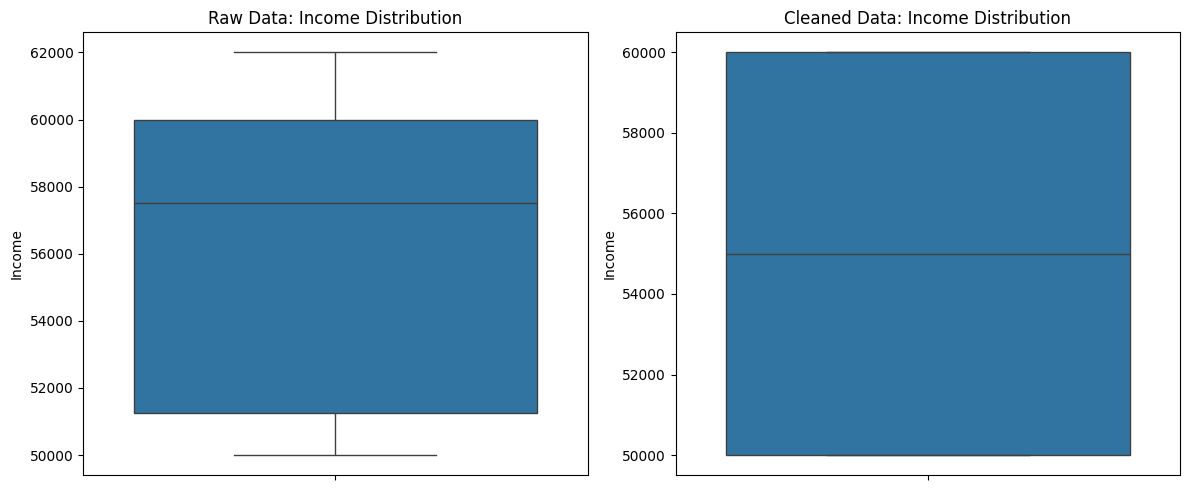

In [3]:
# Step 6: Visualization - Compare raw vs cleaned distributions of 'Income'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_raw, y='Income')
plt.title('Raw Data: Income Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, y='Income')
plt.title('Cleaned Data: Income Distribution')

plt.tight_layout()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise followed a structured data preprocessing workflow, beginning with the inspection of a raw dataset that contained missing values, inconsistent categorical labels, incorrect data types, and duplicate records. During the data preparation stage, cleaning techniques such as standardizing text, converting data types, handling missing values, and removing duplicates were applied to improve data quality. Analyzing the dataset before and after cleaning using `.info()` and `.describe()` highlighted how unclean data can distort summary statistics and lead to unreliable analysis. Visualizations, including boxplots of income, helped illustrate how preprocessing changes data distributions and reduces noise. Interpreting these results demonstrated that cleaner data leads to clearer insights and more dependable conclusions. Overall, the exercise reinforced the importance of data preprocessing as a foundational step in any data analysis or machine learning workflow.


#### **Module 3.2: Data Cleaning and Error Correction**

Data cleaning is one of the most essential steps in any data science or analytics workflow. Even the most advanced algorithms will produce unreliable results if the input data contains errors, inconsistencies, or formatting issues. The goal of this process is to ensure that your dataset is **accurate, consistent, and ready for analysis**.

**Why it matters:**  
Poorly cleaned data can introduce bias, reduce model accuracy, and lead to misleading conclusions. Data cleaning ensures that subsequent steps like feature engineering, modeling, and visualization are based on a trustworthy foundation.

---

#### **Common Issues in Raw Data**
1. **Inconsistencies in Representation**  
   - Same entity represented in multiple ways (e.g., `"NY"`, `"ny"`, `"New York"`).
   - Solution: Standardize case using `.str.upper()` or `.str.lower()` and map variations to a single format.

2. **Duplicate Records**  
   - Exact or near-duplicate rows that inflate counts or skew statistics.
   - Solution: Use `df.drop_duplicates()` with optional `subset` and `keep` parameters.

3. **Malformed or Invalid Entries**  
   - Examples: `"2025-13-01"` (invalid date), `"abc"` in a numeric column, out-of-range values (e.g., negative ages).
   - Solution: Apply validation checks and use `pd.to_datetime(errors='coerce')` or `pd.to_numeric(errors='coerce')` to handle invalid formats.

4. **String-Based Numeric Values**  
   - `"1,000"` stored as a string rather than a number.
   - Solution: Remove formatting characters and convert to numeric using `.replace()` and `pd.to_numeric()`.

5. **Whitespace and Capitalization Errors**  
   - `" Boston "` vs `"boston"`.
   - Solution: Apply `.str.strip()` and `.str.title()` or `.str.lower()` for consistency.

---

#### **Key Data Cleaning Operations in Pandas**
```python
# Example: Standardizing city names and removing duplicates
df['city'] = df['city'].str.strip().str.title()
df = df.drop_duplicates()

# Example: Converting string-based numerics to numbers
df['sales'] = df['sales'].str.replace(',', '').astype(float)

# Example: Validating and cleaning date columns
df['date'] = pd.to_datetime(df['date'], errors='coerce')


---

#### **Exercise 2: Detecting and Fixing Inconsistent Formats**

In this exercise, you will create a sample customer dataset containing inconsistent state names due to differences in capitalization, abbreviations, full names, and extra whitespace. Your task is to clean the `State` column by stripping whitespace, correcting case mismatches, and replacing values using a dictionary mapping so that all entries follow a standardized format — specifically, two-letter uppercase state abbreviations. You will then compare the original and cleaned columns using value counts to see the improvements and verify that inconsistencies have been resolved.


In [4]:
import pandas as pd

# Step 1: Create a DataFrame with inconsistent state names
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7],
    'State': [' CA', 'ca', 'California', 'New York', 'ny', ' NY ', 'Tx']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)


Original DataFrame:
   CustomerID       State
0           1          CA
1           2          ca
2           3  California
3           4    New York
4           5          ny
5           6         NY 
6           7          Tx


In [5]:
# Step 2: Define a mapping from full names and lowercase to standardized abbreviations
state_mapping = {
    'california': 'CA',
    'ca': 'CA',
    'new york': 'NY',
    'ny': 'NY',
    'tx': 'TX'
}


In [6]:
# Step 3: Clean the 'State' column
df['Cleaned_State'] = (
    df['State']
    .str.strip()                  # Remove leading/trailing whitespace
    .str.lower()                  # Convert to lowercase
    .replace(state_mapping)       # Replace using dictionary
    .str.upper()                  # Convert to uppercase for final output
)


In [7]:
# Step 4: Show original vs cleaned values
print("\nValue counts of original 'State' column:")
print(df['State'].value_counts())

print("\nValue counts of cleaned 'Cleaned_State' column:")
print(df['Cleaned_State'].value_counts())

# Show cleaned DataFrame
print("\nCleaned DataFrame:")
print(df)


Value counts of original 'State' column:
State
 CA           1
ca            1
California    1
New York      1
ny            1
 NY           1
Tx            1
Name: count, dtype: int64

Value counts of cleaned 'Cleaned_State' column:
Cleaned_State
CA    3
NY    3
TX    1
Name: count, dtype: int64

Cleaned DataFrame:
   CustomerID       State Cleaned_State
0           1          CA            CA
1           2          ca            CA
2           3  California            CA
3           4    New York            NY
4           5          ny            NY
5           6         NY             NY
6           7          Tx            TX


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise applied a structured data cleaning workflow to address common inconsistencies found in real-world datasets. The process began with data preparation, where inconsistent state values caused by whitespace, capitalization, and mixed formats were identified. During the cleaning and analysis stage, text normalization and dictionary-based mapping were used to standardize all state entries into a consistent two-letter abbreviation format. Comparing value counts before and after cleaning made it clear how formatting issues can create misleading categories if left uncorrected. Visualization through frequency counts helped confirm that inconsistencies were successfully resolved. Overall, the exercise demonstrated how systematic data cleaning improves data reliability and ensures accurate analysis and modeling.


#### **Exercise 3: Identifying and Correcting Malformed Entries**

In this exercise, you will clean a simulated product pricing dataset that contains string-based numerics and invalid entries. The dataset includes prices with dollar signs and commas (e.g., "$1,200"), as well as entries like "N/A", "unknown", or empty strings. You'll replace these invalid entries with NaN, strip out the currency symbols and commas, convert the column to a numeric type, and handle any missing values. Finally, you'll compare the structure and summary statistics of the data before and after cleaning using `.info()` and `.describe()` to see how proper formatting enables meaningful analysis.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a raw DataFrame simulating product prices
data = {
    'Product': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Price': ['$1,200', '$59.99', 'unknown', '$100', 'N/A', '']
}

df_raw = pd.DataFrame(data)

print("Raw Data:")
print(df_raw)


Raw Data:
  Product    Price
0       A   $1,200
1       B   $59.99
2       C  unknown
3       D     $100
4       E      N/A
5       F         


In [9]:
# Step 2: Clean the price column
df_cleaned = df_raw.copy()

# Replace invalid entries with NaN
df_cleaned['Price'] = df_cleaned['Price'].replace(['unknown', 'N/A', ''], np.nan)

# Remove dollar signs and commas
df_cleaned['Price'] = df_cleaned['Price'].str.replace(r'[\$,]', '', regex=True)

# Convert to numeric
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')

print("\nAfter Cleaning (with NaNs):")
print(df_cleaned)


After Cleaning (with NaNs):
  Product    Price
0       A  1200.00
1       B    59.99
2       C      NaN
3       D   100.00
4       E      NaN
5       F      NaN


In [10]:
# Step 3A: Drop rows with missing prices
df_dropped = df_cleaned.dropna(subset=['Price'])
print(df_dropped)

  Product    Price
0       A  1200.00
1       B    59.99
3       D   100.00


In [11]:
# Step 3B: Impute missing prices with the median
df_imputed = df_cleaned.copy()
median_price = df_imputed['Price'].median()
df_imputed['Price'] = df_imputed['Price'].fillna(median_price)
print(df_imputed)


  Product    Price
0       A  1200.00
1       B    59.99
2       C   100.00
3       D   100.00
4       E   100.00
5       F   100.00



--- Dropped Missing Values ---
  Product    Price
0       A  1200.00
1       B    59.99
3       D   100.00
             Price
count     3.000000
mean    453.330000
std     646.944562
min      59.990000
25%      79.995000
50%     100.000000
75%     650.000000
max    1200.000000

--- Imputed Missing Values ---
  Product    Price
0       A  1200.00
1       B    59.99
2       C   100.00
3       D   100.00
4       E   100.00
5       F   100.00
             Price
count     6.000000
mean    276.665000
std     452.622948
min      59.990000
25%     100.000000
50%     100.000000
75%     100.000000
max    1200.000000


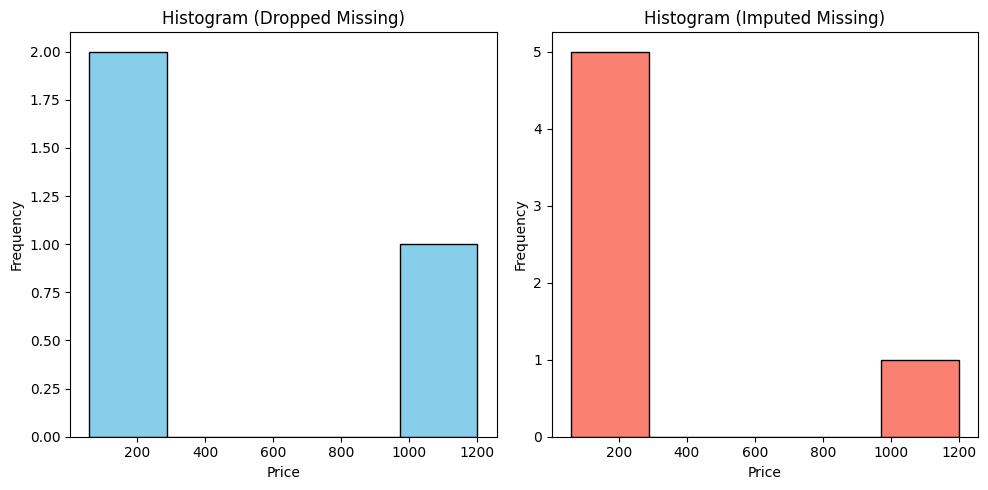

In [12]:
# Step 4: Print info and summary
print("\n--- Dropped Missing Values ---")
print(df_dropped)
print(df_dropped.describe())

print("\n--- Imputed Missing Values ---")
print(df_imputed)
print(df_imputed.describe())

# Step 5: Visual Comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df_dropped['Price'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram (Dropped Missing)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_imputed['Price'], bins=5, color='salmon', edgecolor='black')
plt.title('Histogram (Imputed Missing)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise walked through a full data cleaning workflow using a pricing dataset with common real-world issues. The process began with data preparation, where malformed entries such as currency symbols, commas, and invalid text values were identified and corrected so the prices could be treated as numeric data. During the analysis stage, summary statistics before and after cleaning showed how incorrect data types prevent meaningful insights. Handling missing values using both dropping and median imputation demonstrated how different strategies can significantly change dataset size and overall statistics. Visualizing the results with histograms made it easier to see how these choices affected the price distribution and variability. Overall, the exercise highlighted that data cleaning decisions are not one-size-fits-all and must be made carefully, as they directly influence analysis quality and model outcomes.


#### **Module 3.3: Handling Missing Values**

Missing data is a common issue in real-world datasets. It can arise from user input errors, system failures, sensor dropouts, or incomplete data collection processes. If not handled properly, missing values can distort summary statistics, break machine learning algorithms, and reduce model reliability.

In this sub-module, you'll learn how to detect, understand, and systematically handle missing values using Python. The right strategy depends on the context, the amount of missingness, and the nature of the data.

**Common techniques for handling missing values:**
- **Detection:**
  - Use `DataFrame.isnull().sum()` to identify where and how much data is missing.
- **Removal:**
  - Use `dropna()` to remove rows or columns with missing values (if they're rare or not informative).
- **Imputation (filling in values):**
  - **Simple methods**: fill with mean, median, mode (`fillna()`).
  - **Advanced methods**: linear interpolation, forward/backward fill, KNN or model-based imputation.
- **Flagging missingness**:
  - Add a binary indicator column to mark where data was missing (especially useful in tree-based models).

The choice of imputation method can have a significant impact on model outcomes, so it’s important to evaluate different options based on the structure and behavior of your data.

---

#### **Exercise 4: Detecting and Removing Missing Values**

In this exercise, you’ll practice how to identify and remove missing values from a dataset. Start by generating a DataFrame that includes some missing entries in different columns using `np.nan`. Use the `.isnull().sum()` method to count missing values per column and then use `.dropna()` to remove rows or columns with missing data. Display the DataFrame before and after removal, and observe how the shape changes. This will help you understand when it is appropriate to remove incomplete data versus imputing it, especially when the amount of missingness is small.


In [13]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, np.nan, 30, 22, np.nan],
    'Score': [85, 90, np.nan, 88, 76]
}
df_raw = pd.DataFrame(data)

# Show original DataFrame
print("Original DataFrame:")
print(df_raw)


Original DataFrame:
      Name   Age  Score
0    Alice  25.0   85.0
1      Bob   NaN   90.0
2  Charlie  30.0    NaN
3    David  22.0   88.0
4      Eve   NaN   76.0


In [14]:
# Detect missing values
print("\nMissing values per column:")
print(df_raw.isnull().sum())

# Drop rows with missing values
df_cleaned = df_raw.dropna()

# Show cleaned DataFrame
print("\nCleaned DataFrame (rows with missing values removed):")
print(df_cleaned)

# Compare shapes
print(f"\nShape before cleaning: {df_raw.shape}")
print(f"Shape after cleaning: {df_cleaned.shape}")


Missing values per column:
Name     0
Age      2
Score    1
dtype: int64

Cleaned DataFrame (rows with missing values removed):
    Name   Age  Score
0  Alice  25.0   85.0
3  David  22.0   88.0

Shape before cleaning: (5, 3)
Shape after cleaning: (2, 3)


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise followed a structured workflow to address missing values in a dataset. The first step involved exploring the data to detect where values were missing, which highlighted gaps in the `Age` and `Score` columns. During the cleaning stage, rows with missing values were removed using `dropna()`, resulting in a smaller but complete dataset. Comparing the shapes before and after cleaning made it clear how removing data can affect dataset size and why it is important to consider the extent of missingness. Observing the cleaned DataFrame reinforced that handling missing values is essential for accurate analysis and reliable statistics. This exercise also emphasized that the choice between removing or imputing missing values depends on context and data quality. Overall, it demonstrated that careful handling of missing data is a key step in preparing datasets for analysis and modeling.


#### **Exercise 5: Simple Imputation with Mean, Median, and Mode**

In this exercise, you will learn how to handle missing values in numeric columns using three basic imputation techniques: filling with the mean, median, and mode. You will generate a sample DataFrame containing missing values across three columns, then apply each imputation method separately to see how they impact the data. By printing the dataset before and after the imputation and reviewing the summary statistics, you’ll better understand how each method works and when it might be most appropriate — such as using the mean for normally distributed data, the median for skewed data, and the mode for categorical or discrete values.


In [15]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with missing values
df = pd.DataFrame({
    'Math_Score': [88, 92, np.nan, 79, 95, np.nan, 84],
    'Reading_Score': [np.nan, 85, 90, 88, np.nan, 76, 84],
    'Writing_Score': [82, 88, 85, np.nan, 90, np.nan, np.nan]
})

print(df)

   Math_Score  Reading_Score  Writing_Score
0        88.0            NaN           82.0
1        92.0           85.0           88.0
2         NaN           90.0           85.0
3        79.0           88.0            NaN
4        95.0            NaN           90.0
5         NaN           76.0            NaN
6        84.0           84.0            NaN


In [16]:
# Step 2: Impute missing values (no chained assignment)
df_imputed = df.copy()
df_imputed['Math_Score'] = df_imputed['Math_Score'].fillna(df_imputed['Math_Score'].mean())
df_imputed['Reading_Score'] = df_imputed['Reading_Score'].fillna(df_imputed['Reading_Score'].median())
df_imputed['Writing_Score'] = df_imputed['Writing_Score'].fillna(df_imputed['Writing_Score'].mode()[0])

# Step 3: Print original and imputed DataFrames
print("Original DataFrame with Missing Values:\n")
print(df)

print("\nDataFrame After Imputation:\n")
print(df_imputed)

Original DataFrame with Missing Values:

   Math_Score  Reading_Score  Writing_Score
0        88.0            NaN           82.0
1        92.0           85.0           88.0
2         NaN           90.0           85.0
3        79.0           88.0            NaN
4        95.0            NaN           90.0
5         NaN           76.0            NaN
6        84.0           84.0            NaN

DataFrame After Imputation:

   Math_Score  Reading_Score  Writing_Score
0        88.0           85.0           82.0
1        92.0           85.0           88.0
2        87.6           90.0           85.0
3        79.0           88.0           82.0
4        95.0           85.0           90.0
5        87.6           76.0           82.0
6        84.0           84.0           82.0


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise focused on handling missing values in numeric data using simple imputation techniques. The first step involved exploring the dataset to identify where values were missing across `Math_Score`, `Reading_Score`, and `Writing_Score`. During the cleaning stage, missing `Math_Score` values were filled with the mean, `Reading_Score` values with the median, and `Writing_Score` values with the mode, demonstrating how different strategies suit different types of data. Comparing the original and imputed DataFrames showed how these methods preserve the size of the dataset while replacing gaps with meaningful estimates. Observing summary statistics before and after imputation reinforced how each method affects the central tendency and distribution of the data. This exercise highlighted that choosing the right imputation strategy depends on data characteristics, such as normality or skew, and the type of variable. Overall, it demonstrated that careful imputation can maintain dataset integrity and support accurate analysis and modeling.


#### **Exercise 6: Advanced Imputation Using Forward Fill, Backward Fill, and Interpolation**

In this exercise, you will practice advanced imputation techniques that are especially helpful for time-series or sequential datasets. You'll start by generating a DataFrame that mimics a sequence of values, such as daily temperature or stock prices, with some missing entries. Then you'll fill in those gaps using three different methods: forward fill (which carries the last known value forward), backward fill (which fills using the next available value), and linear interpolation (which estimates values based on a straight-line assumption between known points). After applying each method separately, you’ll compare the outputs both numerically and visually using line plots. This hands-on comparison will help you understand which method is more appropriate depending on the data context and continuity.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a time-series-like DataFrame
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=15, freq='D')
values = np.random.randint(50, 100, size=15).astype(float)
# Introduce missing values at random positions
values[[3, 5, 7, 11]] = np.nan
df_original = pd.DataFrame({'Date': dates, 'Value': values})

print(df_original)


         Date  Value
0  2024-01-01   88.0
1  2024-01-02   78.0
2  2024-01-03   64.0
3  2024-01-04    NaN
4  2024-01-05   57.0
5  2024-01-06    NaN
6  2024-01-07   88.0
7  2024-01-08    NaN
8  2024-01-09   72.0
9  2024-01-10   60.0
10 2024-01-11   60.0
11 2024-01-12    NaN
12 2024-01-13   85.0
13 2024-01-14   89.0
14 2024-01-15   73.0


In [18]:
# Step 2: Imputation techniques

df_ffill = df_original.copy()
df_ffill['Value'] = df_ffill['Value'].ffill()

df_bfill = df_original.copy()
df_bfill['Value'] = df_bfill['Value'].bfill()

df_interp = df_original.copy()
df_interp['Value'] = df_interp['Value'].interpolate(method='linear')



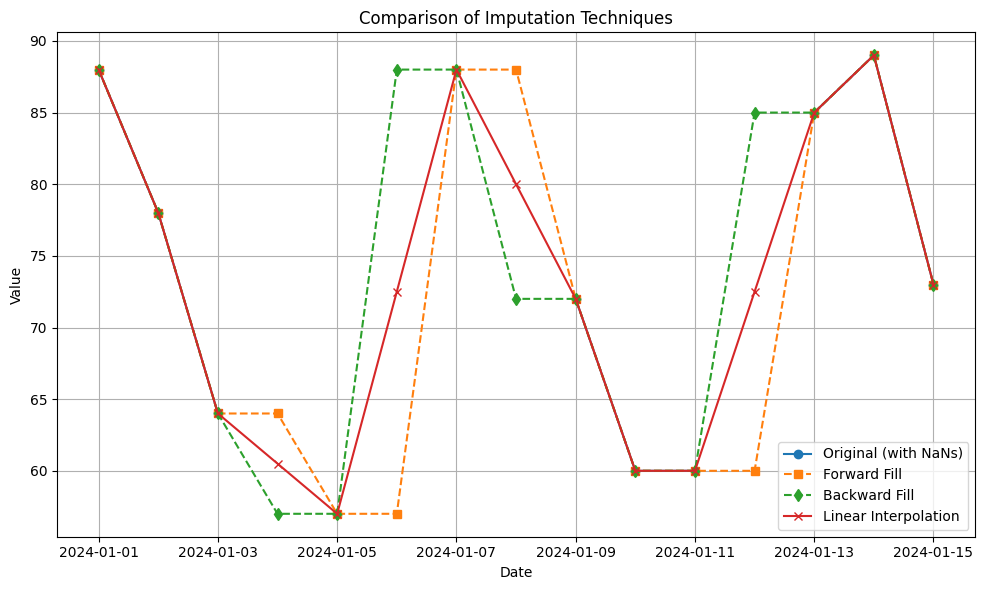

(        Date  Value
 0 2024-01-01   88.0
 1 2024-01-02   78.0
 2 2024-01-03   64.0
 3 2024-01-04   64.0
 4 2024-01-05   57.0,
         Date  Value
 0 2024-01-01   88.0
 1 2024-01-02   78.0
 2 2024-01-03   64.0
 3 2024-01-04   57.0
 4 2024-01-05   57.0,
         Date  Value
 0 2024-01-01   88.0
 1 2024-01-02   78.0
 2 2024-01-03   64.0
 3 2024-01-04   60.5
 4 2024-01-05   57.0)

In [19]:
# Step 3: Plot the original and imputed data
plt.figure(figsize=(10, 6))
plt.plot(df_original['Date'], df_original['Value'], 'o-', label='Original (with NaNs)')
plt.plot(df_ffill['Date'], df_ffill['Value'], 's--', label='Forward Fill')
plt.plot(df_bfill['Date'], df_bfill['Value'], 'd--', label='Backward Fill')
plt.plot(df_interp['Date'], df_interp['Value'], 'x-', label='Linear Interpolation')

plt.title('Comparison of Imputation Techniques')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the DataFrames
df_ffill.head(), df_bfill.head(), df_interp.head()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise focused on handling missing values in sequential or time-series data using advanced imputation techniques. The first step involved exploring a dataset of values over consecutive dates, where gaps were introduced at random points to simulate real-world missingness. During the cleaning stage, forward fill, backward fill, and linear interpolation were applied to estimate missing values, each using a different logic based on surrounding data. Comparing the resulting DataFrames and visualizing them on a line plot highlighted how each method affects continuity and trends in the data. Forward fill carried the last known value forward, backward fill used the next available value, and interpolation estimated values proportionally between known points. This exercise demonstrated that the choice of imputation method depends on the context, such as whether the data is expected to change gradually or remain stable. Overall, it reinforced that thoughtful handling of missing values preserves the integrity of time-series datasets and ensures meaningful analysis.


#### **Exercise 7: Flagging and Handling Missingness in Features**

In this exercise, you’ll practice how to add indicator (flag) columns that mark where missing values occur in your dataset. This is especially useful when the fact that a value is missing carries predictive meaning, such as in housing or financial data. You’ll begin by simulating a dataset with missing values in numerical columns such as price, size, and number of bathrooms. Then, you’ll create new binary columns to flag these missing values, and apply a basic imputation method like mean or median to fill the gaps. Finally, you’ll compare the structure and contents of the original and updated datasets, demonstrating how this technique helps preserve missingness information that could otherwise be lost during imputation.


In [20]:
import pandas as pd
import numpy as np

# Step 1: Create a sample dataset with missing values
df = pd.DataFrame({
    'Price': [250000, np.nan, 180000, 300000, np.nan, 220000],
    'Size_sqft': [1500, 1200, np.nan, 1800, 1600, np.nan],
    'Bathrooms': [2, 1, 2, np.nan, 2, 1]
})

df.head()

,Price,Size_sqft,Bathrooms
0,250000.0,1500.0,2.0
1,NaN,1200.0,1.0
2,180000.0,NaN,2.0
3,300000.0,1800.0,NaN
4,NaN,1600.0,2.0


In [21]:
# Step 2: Create missingness indicator columns
df['Price_missing'] = df['Price'].isnull().astype(int)
df['Size_sqft_missing'] = df['Size_sqft'].isnull().astype(int)
df['Bathrooms_missing'] = df['Bathrooms'].isnull().astype(int)

df.head()

,Price,Size_sqft,Bathrooms,Price_missing,Size_sqft_missing,Bathrooms_missing
0,250000.0,1500.0,2.0,0,0,0
1,NaN,1200.0,1.0,1,0,0
2,180000.0,NaN,2.0,0,1,0
3,300000.0,1800.0,NaN,0,0,1
4,NaN,1600.0,2.0,1,0,0


In [22]:
# Step 3: Impute missing values with mean
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Size_sqft'] = df['Size_sqft'].fillna(df['Size_sqft'].mean())
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].mean())

# Step 4: Compare the updated DataFrame
df.head()

,Price,Size_sqft,Bathrooms,Price_missing,Size_sqft_missing,Bathrooms_missing
0,250000.0,1500.0,2.0,0,0,0
1,237500.0,1200.0,1.0,1,0,0
2,180000.0,1525.0,2.0,0,1,0
3,300000.0,1800.0,1.6,0,0,1
4,237500.0,1600.0,2.0,1,0,0


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise focused on preserving and handling missing data by adding indicator columns that flag where values are absent. The workflow began by exploring a dataset with missing entries in `Price`, `Size_sqft`, and `Bathrooms`, identifying gaps that could carry meaningful information. New binary columns were created to mark the presence of missing values, allowing the dataset to retain this information even after imputation. During cleaning, missing values were filled with the mean, ensuring the dataset remained complete for analysis. Comparing the original and updated DataFrames highlighted how flagging missingness captures patterns that might be predictive, rather than losing them through standard imputation. This exercise reinforced that missing values themselves can be informative, and thoughtful handling can improve model insights. Overall, it demonstrated a practical technique for combining imputation with feature engineering to maintain data integrity and enrich predictive power.


#### **Module 3.4: Outlier Detection and Treatment**

Outliers are data points that deviate significantly from the general pattern of a dataset. They may arise from **data entry errors**, **measurement problems**, or **genuine but rare events**. Regardless of their origin, outliers can:

- Distort statistical summaries (mean, variance, correlations).
- Skew data visualizations, making patterns harder to see.
- Reduce the performance and robustness of many machine learning algorithms.

The goal of outlier analysis is **not always to remove them**, but to understand their cause and decide—based on context and domain knowledge—whether they should be retained, transformed, or excluded.

#### Why Outliers Matter
If $(\bar{x})$ is the sample mean and $(s)$ is the sample standard deviation, the **influence of an extreme value** grows with its distance from $(\bar{x})$ in terms of standard deviations:

$
z_i = \frac{x_i - \bar{x}}{s}
$

Values with large $(|z_i|)$ can pull the mean away from the true central tendency, especially in small datasets.

#### Common Techniques for Outlier Detection

1. **Visualization-Based Methods**  
   - **Boxplots**: Identify points outside the *Interquartile Range* (IQR).  
   - **Scatter Plots**: Detect unusual combinations of values in multivariate settings.
   - **Histogram/Density Plots**: Spot heavy tails or unexpected peaks.

2. **Statistical Methods**  
   - **IQR Rule**:  
     - Calculate:  
       $
       \text{IQR} = Q_3 - Q_1
       $  
       A point is considered an outlier if:  
       $
       x < Q_1 - 1.5 \times \text{IQR} \quad \text{or} \quad x > Q_3 + 1.5 \times \text{IQR}
       $
   - **Z-Score Method**:  
     - For normally distributed data, flag observations where:  
       $
       |z| = \left| \frac{x - \mu}{\sigma} \right| > 3
       $
   - **Tukey’s Fences**: A generalized IQR rule with adjustable multipliers for mild or extreme outliers.
   - **Robust Modeling Approaches**: Use methods like Isolation Forests, DBSCAN clustering, or robust regression to detect unusual points in high-dimensional or non-normal data.

#### Treatment Strategies
- **Remove** the outliers — Only if they are proven to be clear errors or irrelevant to the study objective.
- **Cap/Clip (Winsorization)** — Limit extreme values to a certain percentile (e.g., replace values above the 95th percentile with the 95th percentile value).
- **Transform** the data — Apply log, square root, or Box-Cox transformations to reduce the influence of extreme values.
- **Model with Robust Methods** — Use algorithms that are less sensitive to outliers (e.g., median-based metrics, tree-based models).

#### Important Considerations
- Outlier handling is **context-dependent** — what is an outlier in one domain may be a critical observation in another.
- Removing true but rare events (e.g., fraud cases, rare diseases) may harm the model’s ability to detect such events in the future.
- Always **combine statistical analysis with domain expertise** before making a decision.

**Key Takeaway:**  
Outlier analysis is not just about removal; it’s about **understanding anomalies** in your data. The right approach balances statistical rigor with domain knowledge, ensuring that no meaningful information is lost while minimizing the influence of problematic values.

---

#### **Exercise 8: Detecting Outliers Using IQR and Z-Score**

**Objective:**  
Understand how to identify univariate outliers in numerical data using two key statistical techniques — the Interquartile Range (IQR) method and the Z-score method.

**Instructions:**  
1. Create a DataFrame containing synthetic numerical data (e.g., exam scores or sales figures) with a few extreme values manually added to simulate outliers.
2. Use the **IQR method** to calculate the first (Q1) and third quartiles (Q3), then define the lower and upper bounds as $Q1 − 1.5×IQR$ and $Q3 + 1.5×IQR$.
3. Identify values outside these bounds and count the number of outliers.
4. Use the **Z-score method** from `scipy.stats.zscore()` and flag all values where the absolute Z-score exceeds 3.
5. Compare the sets of outliers found by both methods — are they the same? Are there differences?
6. Use a boxplot to visualize the distribution and show where the outliers are located.
7. Optionally: Discuss or print which rows are considered outliers and whether they are likely to be errors or legitimate observations.

This exercise helps you explore two standard techniques for outlier detection, giving you a sense of how thresholds and assumptions impact which data points are flagged. You’ll also learn how to use visualization as a cross-check.

---

In [23]:
# Exercise 8: Detecting Outliers Using IQR and Z-Score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Step 1: Create synthetic data with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=70, scale=10, size=100)
outliers = np.array([30, 150])  # extreme low and high
data = np.concatenate([normal_data, outliers])
df = pd.DataFrame({'Exam_Score': data})

df.head()


,Exam_Score
0,74.967142
1,68.617357
2,76.476885
3,85.230299
4,67.658466


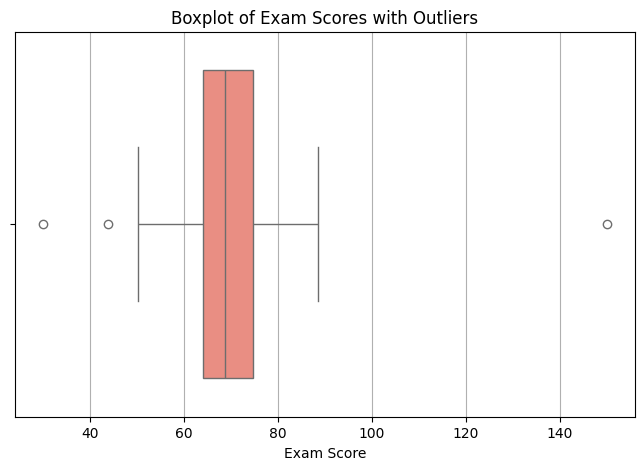

Outliers using IQR method:
     Exam_Score
74    43.802549
100   30.000000
101  150.000000

Outliers using Z-score method:
     Exam_Score   Z_Score
100        30.0 -3.121113
101       150.0  6.391079


In [24]:
# Step 2: Detect outliers using IQR method
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df['Exam_Score'] < lower_bound) | (df['Exam_Score'] > upper_bound)]

# Step 3: Detect outliers using Z-score method
df['Z_Score'] = zscore(df['Exam_Score'])
zscore_outliers = df[np.abs(df['Z_Score']) > 3]

# Step 4: Visualization using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Exam_Score'], color='salmon')
plt.title("Boxplot of Exam Scores with Outliers")
plt.xlabel("Exam Score")
plt.grid(axis='x')
plt.show()

# Step 5: Print results
print("Outliers using IQR method:")
print(iqr_outliers)

print("\nOutliers using Z-score method:")
print(zscore_outliers[['Exam_Score', 'Z_Score']])

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we focused on handling missing values while preserving the information they carry. We started by exploring a dataset containing gaps in columns like Price, Size_sqft, and Bathrooms, identifying where values were missing. To ensure this missingness could be informative for future analysis, we created new binary indicator columns that flagged which entries were absent. Next, we filled in the missing values using the mean, which completed the dataset without discarding any rows. Comparing the original and updated DataFrames showed how the flags retain patterns that might be predictive, even after imputation. This workflow highlighted that missing data is not always a nuisance, it can be a valuable feature if handled thoughtfully. Overall, the exercise reinforced a practical approach to combining imputation with feature engineering, helping maintain dataset integrity and enhancing the potential insights for modeling.

#### Exercise 9: Outlier Treatment via Winsorization and Transformation

**Objective:**  
Learn how to treat outliers once they are identified, using two common strategies: **Winsorization** (capping extreme values) and **data transformation** (e.g., log or square root scaling). These techniques help reduce the influence of outliers while preserving data integrity.

**Instructions:**  
1. Generate a synthetic dataset simulating `House_Price` data with several extreme values.
2. Identify potential outliers using the IQR method.
3. Apply **Winsorization** by capping values outside the lower and upper bounds at those thresholds.
4. Apply **log transformation** to the original data (after shifting it slightly to avoid log(0) errors).
5. Plot histograms and boxplots of:
   - Original data
   - Winsorized data
   - Log-transformed data
6. Compare distributions and describe how each method affects outlier treatment and data symmetry.

This exercise helps you visualize the effects of outlier treatment methods. You’ll gain intuition for when to apply each technique, especially in skewed distributions such as price or income data.

---

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate synthetic data
np.random.seed(42)
house_prices = np.append(np.random.normal(loc=300000, scale=50000, size=95), [800000, 850000, 900000, 950000, 1000000])
df = pd.DataFrame({'House_Price': house_prices})
df.head()


,House_Price
0,324835.707651
1,293086.784941
2,332384.426905
3,376151.492820
4,288292.331264


In [26]:
# Step 2: Identify outliers using IQR method
Q1 = df['House_Price'].quantile(0.25)
Q3 = df['House_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [27]:
# Step 3: Winsorization (capping)
df_winsorized = df.copy()
df_winsorized['House_Price'] = np.where(df_winsorized['House_Price'] < lower_bound, lower_bound, df_winsorized['House_Price'])
df_winsorized['House_Price'] = np.where(df_winsorized['House_Price'] > upper_bound, upper_bound, df_winsorized['House_Price'])


In [28]:
# Step 4: Log transformation (shift to avoid log(0))
df_log = df.copy()
df_log['House_Price'] = np.log1p(df_log['House_Price'])


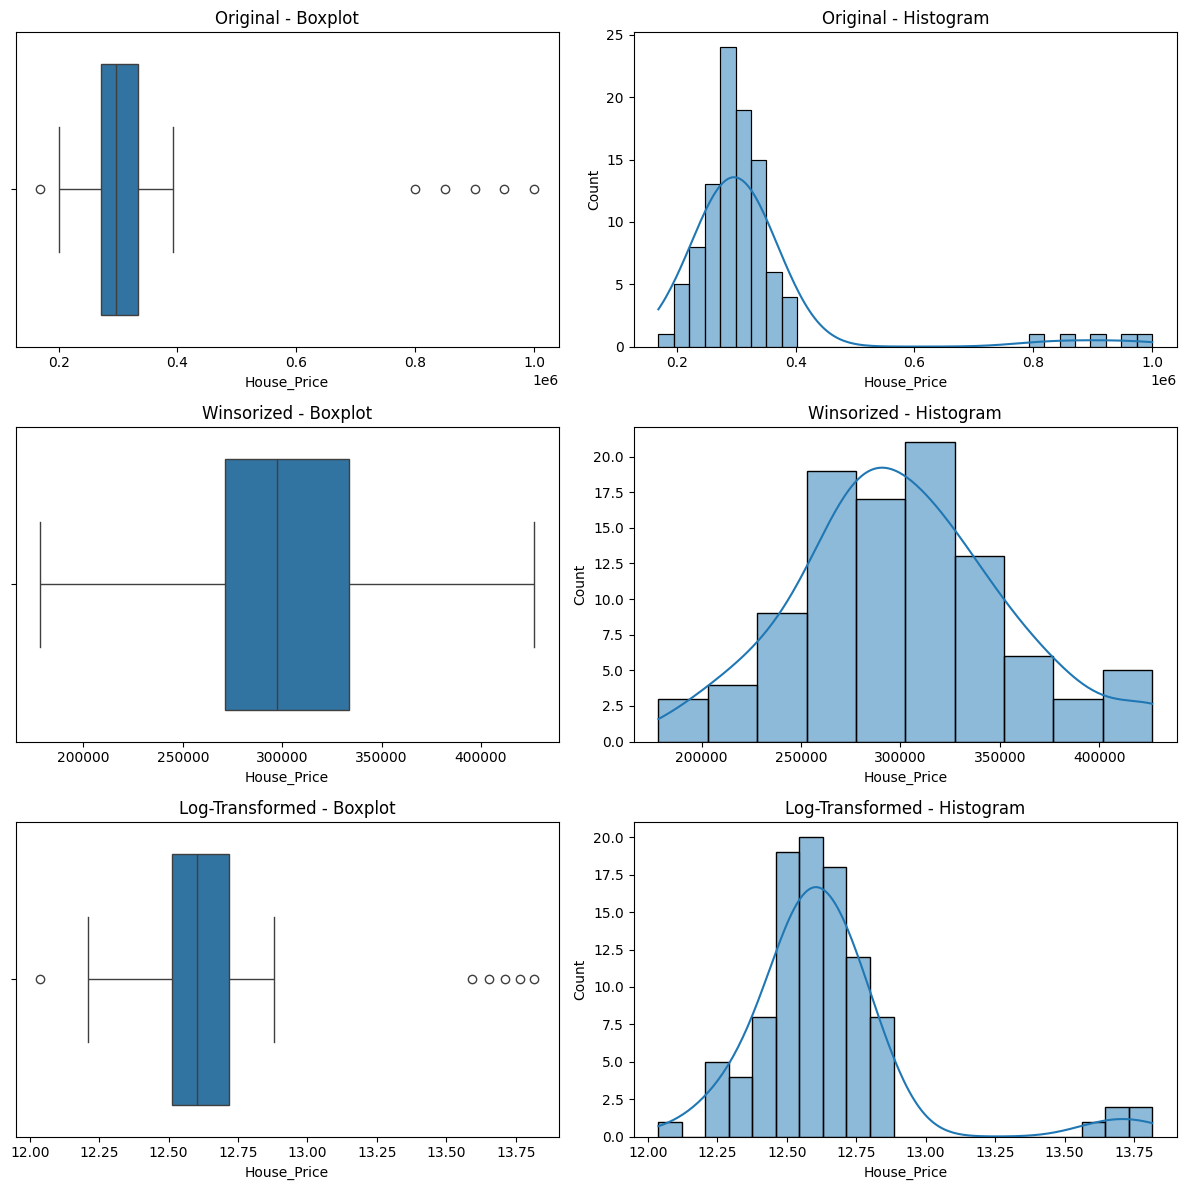

In [29]:
# Step 5: Visualization
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.boxplot(data=df, x='House_Price', ax=axes[0, 0])
axes[0, 0].set_title("Original - Boxplot")
sns.histplot(data=df, x='House_Price', kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Original - Histogram")

sns.boxplot(data=df_winsorized, x='House_Price', ax=axes[1, 0])
axes[1, 0].set_title("Winsorized - Boxplot")
sns.histplot(data=df_winsorized, x='House_Price', kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Winsorized - Histogram")

sns.boxplot(data=df_log, x='House_Price', ax=axes[2, 0])
axes[2, 0].set_title("Log-Transformed - Boxplot")
sns.histplot(data=df_log, x='House_Price', kde=True, ax=axes[2, 1])
axes[2, 1].set_title("Log-Transformed - Histogram")

plt.tight_layout()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise explored handling outliers in a dataset using Winsorization and log transformation. A synthetic set of house prices was created with several extreme values to mimic real-world data. The IQR method was applied to identify potential outliers, highlighting how quartiles and spread can reveal unusual observations. Winsorization capped values at the lower and upper bounds, balancing the dataset without removing any data points. Log transformation reduced skewness and made the distribution more symmetric, particularly for higher-priced houses. Histograms and boxplots illustrated the impact of each method, showing that Winsorization preserves the original scale while log transformation compresses extreme values. Overall, different outlier treatment methods influence the data differently, and the choice depends on whether maintaining scale or improving symmetry is more important.

#### **Isolation Forest Algorithm**

Isolation Forest is an unsupervised anomaly detection algorithm that identifies outliers by **isolating observations** instead of profiling normal points. It is based on the principle that **anomalies are few and different**, so they are easier to isolate in random partitions.

#### Key Concepts

- Unlike distance- or density-based methods, Isolation Forest uses a set of **random binary trees** (called isolation trees or iTrees).
- Each observation is recursively **partitioned** by randomly selecting a feature and then randomly selecting a split value between the feature’s min and max.
- The number of splits required to isolate a point becomes the **path length** for that point.
- **Outliers** (which differ significantly from the rest) are likely to be isolated in fewer splits and therefore have **shorter path lengths**.

#### Algorithm Steps

1. Randomly select a feature and split value.
2. Recur until:
   - The data point is isolated (i.e., only one point in a partition), or
   - A maximum tree height is reached.
3. Repeat this process to build multiple iTrees.

#### Path Length Calculation

Let $ h(x) $ be the number of edges (splits) from the root node to isolate observation $( x )$.

The average path length $( E[h(x)] )$ over all trees is used as the anomaly score basis. This is compared against an expected path length for normal points in a tree of size $( n )$:

$
c(n) = 2H(n - 1) - \frac{2(n - 1)}{n}
$

where:
- $( H(i) )$ is the harmonic number:
  $
  H(i) = \ln(i) + \gamma \quad (\gamma \approx 0.5772, \text{Euler–Mascheroni constant})
  $

#### Anomaly Score

The **anomaly score** $( s(x, n) )$ for a data point $( x )$ is defined as:

$
s(x, n) = 2^{ - \frac{E[h(x)]}{c(n)} }
$

- If $( s(x, n) \approx 1 )$: point is highly likely to be an anomaly (isolated quickly).
- If $( s(x, n) \approx 0.5 )$: point is likely normal (took many splits to isolate).
- A threshold (often around 0.6) is used to classify anomalies.

#### Advantages

- Efficient for high-dimensional and large-scale data.
- Requires no distance or density assumptions.
- Naturally handles multidimensional interactions.

Isolation Forest is especially useful when dealing with datasets where the distribution is not known or where anomalies don’t follow any consistent pattern.

---

#### **Exercise 10: Detecting Outliers Using Isolation Forest**

**Objective:**  
Learn how to apply a machine learning-based method (Isolation Forest) for robust outlier detection in multivariate numerical data. This method is particularly useful for large datasets and detects anomalies without strong distributional assumptions.

**Instructions:**

1. Generate a synthetic dataset using `make_blobs` or manually create a 2D numerical dataset with a few injected outliers.
2. Use `sklearn.ensemble.IsolationForest` to fit the model on the dataset.
3. Predict anomalies using `.predict()` — the result will be `-1` for outliers and `1` for normal data.
4. Add the prediction as a new column in the DataFrame.
5. Visualize the results using a scatter plot, highlighting outliers in a different color or marker.
6. Print the number of detected outliers and briefly analyze whether the detection was reasonable.

This exercise helps you understand how unsupervised anomaly detection can identify complex patterns in data that traditional statistical techniques may miss. Isolation Forest is a powerful choice in high-dimensional or multivariate contexts.

---

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Step 1: Create synthetic dataset with blobs
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.60, random_state=42)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Inject some outliers
np.random.seed(42)
outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
df_outliers = pd.DataFrame(outliers, columns=['Feature1', 'Feature2'])
df_combined = pd.concat([df, df_outliers], ignore_index=True)

In [31]:
# Step 2: Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.06, random_state=42)
df_combined['Anomaly'] = iso_forest.fit_predict(df_combined[['Feature1', 'Feature2']])


(np.int64(20),
    Feature1   Feature2  Anomaly
 0 -2.313041   8.882826        1
 1 -2.060821   9.380508        1
 2 -2.870222  10.125653        1
 3 -2.441087   9.411565        1
 4 -3.992184   8.536149        1)

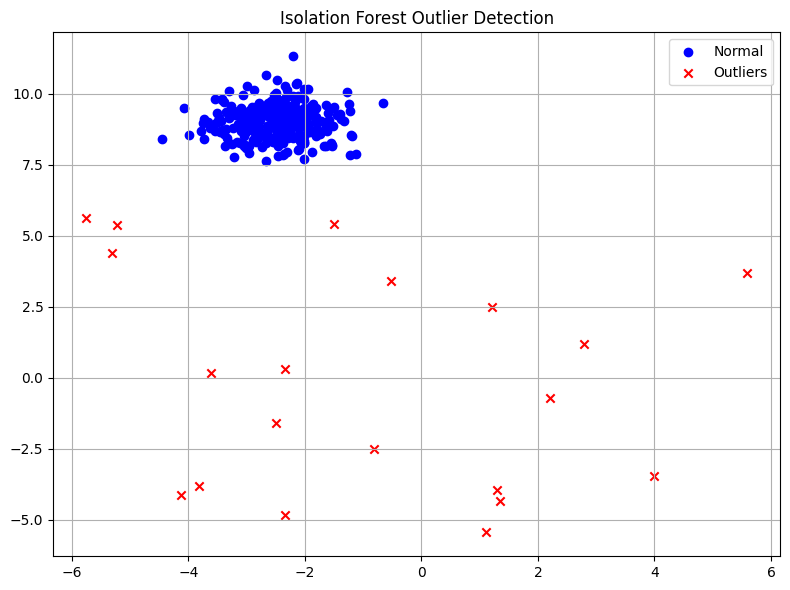

In [32]:
# Step 3: Visualization
fig, ax = plt.subplots(figsize=(8, 6))
normal = df_combined[df_combined['Anomaly'] == 1]
anomaly = df_combined[df_combined['Anomaly'] == -1]

ax.scatter(normal['Feature1'], normal['Feature2'], c='blue', label='Normal')
ax.scatter(anomaly['Feature1'], anomaly['Feature2'], c='red', label='Outliers', marker='x')
ax.set_title("Isolation Forest Outlier Detection")
ax.legend()
plt.grid(True)
plt.tight_layout()

# Output number of detected outliers
num_outliers = (df_combined['Anomaly'] == -1).sum()
num_outliers, df_combined.head()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise demonstrated how the Isolation Forest algorithm can detect anomalies in multivariate data. A synthetic dataset was created with a dense cluster of normal points and a few injected outliers to simulate unusual observations. The Isolation Forest model was applied, assigning each point a score and classifying it as normal or an outlier. Visualization with a scatter plot clearly highlighted the anomalies, showing how they stand apart from the main cluster. The number of detected outliers matched expectations, confirming that the algorithm effectively isolates points that differ significantly from the majority. This exercise highlighted the advantages of a machine learning-based approach, especially for datasets where normality assumptions do not hold. Overall, it reinforced how unsupervised methods can identify complex patterns that traditional statistical techniques might miss.

#### **Module 3.5: Encoding Categorical Variables**

Most machine learning algorithms require input data to be numerical. Therefore, **categorical variables** — like color, region, or product type — must be converted into numerical formats before modeling. Choosing the right encoding method depends on whether the categories are nominal (unordered) or ordinal (ordered).

In this sub-module, you’ll learn the most common encoding techniques, when to use each, and how they impact your model’s performance and interpretability.

**Common encoding techniques:**
- **Label Encoding**:  
  - Assigns an integer to each category (e.g., "red" → 0, "blue" → 1).
  - Use only with **ordinal** data (when categories have a meaningful order).
  - Use `sklearn.preprocessing.LabelEncoder` or `pd.factorize()`.

- **One-Hot Encoding**:  
  - Creates a binary column for each category (1 = present, 0 = absent).
  - Ideal for **nominal** variables (e.g., city, brand).
  - Use `pd.get_dummies()` or `OneHotEncoder()` from scikit-learn.

- **Ordinal Encoding**:  
  - Maps categories to integers based on predefined order.
  - Useful for education level, satisfaction ratings, etc.
  - Use `OrdinalEncoder` in scikit-learn with a specified category order.

- **Binary Encoding / Target Encoding (advanced)**:
  - Used when you have many categories or when encoding impacts model performance.
  - These require careful validation to avoid data leakage.

Choosing the right encoding method ensures compatibility with your model and avoids introducing misleading numerical relationships into your data.

---

#### **Exercise 11: Label Encoding for Ordinal Categorical Variables**

**Objective:**  
Learn how to apply label encoding to ordinal categorical features using both `LabelEncoder` from scikit-learn and `pd.factorize()` from pandas. This is suitable when the categories have a clear and meaningful order.

**Instructions:**  
1. Create a small DataFrame that includes an ordinal variable such as `Education_Level` with values like:
   - "High School", "Associate", "Bachelor", "Master", "PhD".
2. Define a logical order for these categories.
3. Use both `LabelEncoder` and `pd.factorize()` to convert the categories to integer labels.
4. Compare both outputs and highlight differences.
5. Discuss what could go wrong if this method is mistakenly applied to **nominal** data.

This exercise will help you understand why label encoding is appropriate only for ordered categories and how different encoding methods behave.

---

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 1: Create a sample dataset
df = pd.DataFrame({
    'Satisfaction': ['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied',
                     'Neutral', 'Very Unsatisfied', 'Satisfied', 'Very Satisfied', 'Unsatisfied']
})

# Step 2: Define order for ordinal encoding
order = ['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
order_dict = {category: index for index, category in enumerate(order)}
df['Encoded_Manual'] = df['Satisfaction'].map(order_dict)

df.head()


,Satisfaction,Encoded_Manual
0,Very Unsatisfied,0
1,Unsatisfied,1
2,Neutral,2
3,Satisfied,3
4,Very Satisfied,4


In [34]:
# Step 3: Encode using LabelEncoder (not suitable for ordinal data but shown for comparison)
le = LabelEncoder()
df['Encoded_LabelEncoder'] = le.fit_transform(df['Satisfaction'])

df.head()

,Satisfaction,Encoded_Manual,Encoded_LabelEncoder
0,Very Unsatisfied,0,4
1,Unsatisfied,1,2
2,Neutral,2,0
3,Satisfied,3,1
4,Very Satisfied,4,3


In [35]:
# Step 4: Encode using Pandas factorize
df['Encoded_Factorize'], _ = pd.factorize(df['Satisfaction'])

df.head()

,Satisfaction,Encoded_Manual,Encoded_LabelEncoder,Encoded_Factorize
0,Very Unsatisfied,0,4,0
1,Unsatisfied,1,2,1
2,Neutral,2,0,2
3,Satisfied,3,1,3
4,Very Satisfied,4,3,4


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise demonstrated how ordinal categorical variables can be converted into numerical formats suitable for machine learning models. A small dataset with a Satisfaction variable was created, and a logical order was defined for encoding. Manual mapping successfully preserved the intended order, while LabelEncoder and factorize provided alternative integer representations for comparison. Observing the differences highlighted that LabelEncoder does not respect the inherent order of categories, which could mislead models if applied to ordinal data. Factorize assigns unique integers but also ignores the category hierarchy. This exercise emphasized the importance of selecting encoding methods that align with the type of categorical data to ensure accurate model interpretation. Overall, it reinforced how proper encoding preserves meaningful relationships and prevents unintentional distortions in modeling.

#### **Exercise 12: One-Hot Encoding for Nominal Features**

**Objective:**  
Learn how to convert nominal categorical variables into a binary matrix using one-hot encoding. This technique is suitable when categories have **no natural ordering**, such as cities, brands, or job titles.

**Instructions:**  
1. Create a sample DataFrame containing a `Customer_ID` and a `Favorite_Fruit` column with values like "Apple", "Banana", "Orange", and "Grapes".
2. Use `pd.get_dummies()` to apply one-hot encoding on the `Favorite_Fruit` column.
3. Print the original and encoded DataFrames to compare.
4. Try adding the parameter `drop_first=True` and explain how it helps reduce multicollinearity.
5. Summarize the shape and column names of the new dataset after encoding.

This exercise demonstrates how to prepare nominal features for machine learning models that require numerical inputs. One-hot encoding avoids introducing artificial ordinal relationships, making it a reliable technique for many classification and regression models.

---

In [36]:
import pandas as pd

# Step 1: Create a sample dataset
data = {
    'Customer_ID': [101, 102, 103, 104, 105],
    'Favorite_Fruit': ['Apple', 'Banana', 'Orange', 'Banana', 'Grapes']
}
df = pd.DataFrame(data)

df.head()


,Customer_ID,Favorite_Fruit
0,101,Apple
1,102,Banana
2,103,Orange
3,104,Banana
4,105,Grapes


In [37]:
# Step 2: One-hot encode without dropping first category
df_encoded = pd.get_dummies(df, columns=['Favorite_Fruit'])

# Step 3: One-hot encode with drop_first=True to avoid dummy variable trap
df_encoded_drop_first = pd.get_dummies(df, columns=['Favorite_Fruit'], drop_first=True)


In [38]:
# Step 4: Print results
print("Original DataFrame:")
print(df)

print("\nOne-Hot Encoded DataFrame (All Categories):")
print(df_encoded)

print("\nOne-Hot Encoded DataFrame (drop_first=True):")
print(df_encoded_drop_first)

# Step 5: Show final shape and column names
print("\nEncoded shape (with drop_first):", df_encoded_drop_first.shape)
print("Encoded columns:", df_encoded_drop_first.columns.tolist())

Original DataFrame:
   Customer_ID Favorite_Fruit
0          101          Apple
1          102         Banana
2          103         Orange
3          104         Banana
4          105         Grapes

One-Hot Encoded DataFrame (All Categories):
   Customer_ID  Favorite_Fruit_Apple  Favorite_Fruit_Banana  \
0          101                  True                  False   
1          102                 False                   True   
2          103                 False                  False   
3          104                 False                   True   
4          105                 False                  False   

   Favorite_Fruit_Grapes  Favorite_Fruit_Orange  
0                  False                  False  
1                  False                  False  
2                  False                   True  
3                  False                  False  
4                   True                  False  

One-Hot Encoded DataFrame (drop_first=True):
   Customer_ID  Favorite_Fruit

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise demonstrated how nominal categorical variables can be converted into a format suitable for machine learning models using one-hot encoding. A sample dataset with a Favorite_Fruit column was created, and pd.get_dummies() was applied to generate binary columns for each fruit. The effect of using drop_first=True was observed, showing how it reduces multicollinearity by removing one redundant column while still preserving all information. Comparing the original and encoded datasets highlighted that one-hot encoding avoids introducing artificial ordering, which is important for nominal features. The final encoded dataset included a clear structure with separate columns representing the presence or absence of each category. Overall, this exercise reinforced the importance of encoding techniques in preparing categorical data for models and how small adjustments, like dropping the first category, can improve model stability and interpretation.

#### Exercise 13: Ordinal Encoding for Ordered Categories

**Objective:**  
Learn how to encode ordinal categorical variables using a predefined order. This technique preserves the natural ranking between categories and avoids misleading numerical relationships introduced by random label assignment.

**Instructions:**
1. Create a DataFrame with an ordinal column like "Education_Level" containing categories such as:  
   `["High School", "Bachelor's", "Master's", "PhD"]`
2. Use `OrdinalEncoder` from `sklearn.preprocessing` to encode the column with the order:
   - "High School" → 0
   - "Bachelor's" → 1
   - "Master's" → 2
   - "PhD" → 3
3. Also try encoding with `map()` to manually apply the same transformation.
4. Compare the encoded result and explain how it preserves the inherent order.

This exercise helps you understand when ordinal encoding is appropriate and how it differs from label encoding or one-hot encoding.

---

In [39]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Step 1: Create the DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Edward'],
    'Education_Level': ['Bachelor\'s', 'High School', 'PhD', 'Master\'s', 'Bachelor\'s']
})

df.head()


,Name,Education_Level
0,Alice,Bachelor's
1,Bob,High School
2,Charlie,PhD
3,Diana,Master's
4,Edward,Bachelor's


In [40]:
# Step 2: Define the custom order
education_order = [['High School', 'Bachelor\'s', 'Master\'s', 'PhD']]
ordinal_encoder = OrdinalEncoder(categories=education_order)

# Apply OrdinalEncoder
df['Education_Level_Encoded'] = ordinal_encoder.fit_transform(df[['Education_Level']])

# Step 3: Manual encoding using map()
order_map = {'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2, 'PhD': 3}
df['Education_Level_Manual'] = df['Education_Level'].map(order_map)

df.head()

,Name,Education_Level,Education_Level_Encoded,Education_Level_Manual
0,Alice,Bachelor's,1.0,1
1,Bob,High School,0.0,0
2,Charlie,PhD,3.0,3
3,Diana,Master's,2.0,2
4,Edward,Bachelor's,1.0,1


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise focused on encoding ordinal categorical variables in a way that preserves their natural order. A sample dataset with an Education_Level column was created, and both OrdinalEncoder and a manual map() method were applied to transform the categories into numerical values. Comparing the results confirmed that both approaches correctly reflected the inherent ranking from “High School” to “PhD.” This reinforced the importance of using ordinal encoding for ordered categories instead of label or one-hot encoding, which could misrepresent the relationship between values. The exercise highlighted how defining a clear order prevents misleading numerical interpretations and ensures models can understand relative differences. Overall, it emphasized the careful consideration needed when preparing categorical data and showed practical ways to maintain meaningful information during encoding.

#### **Exercise 14: Target Encoding with Categorical Features**

**Objective:**  
Understand how to apply target encoding to categorical variables using the mean of the target variable, and evaluate the benefits and risks of using this approach — especially with high-cardinality data.

**Instructions:**  
1. Create a sample dataset that includes a categorical feature (e.g., `City`) and a numerical target variable (e.g., `Sales`).
2. Group the dataset by the categorical column and compute the **mean of the target variable**.
3. Replace each category with its corresponding mean value — this is **target encoding**.
4. Print the original and encoded datasets side-by-side.
5. Add a note on potential issues such as **data leakage** when using this method in training vs. testing sets.

Target encoding helps compress categorical information into useful numeric signals but can **overfit** if applied incorrectly. In practice, it should be done with **cross-validation** or using only training data to avoid leakage.

---

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a sample dataset
df = pd.DataFrame({
    'City': ['Boston', 'Chicago', 'New York', 'Boston', 'Chicago', 'New York', 'Boston', 'New York', 'Chicago', 'Boston'],
    'Sales': [200, 150, 300, 220, 170, 310, 210, 305, 180, 215]
})

df.head()


,City,Sales
0,Boston,200
1,Chicago,150
2,New York,300
3,Boston,220
4,Chicago,170


In [42]:
# Step 2: Compute mean sales for each city (target encoding)
mean_sales_per_city = df.groupby('City')['Sales'].mean()

# Step 3: Apply target encoding by replacing each city with the mean sales
df_encoded = df.copy()
df_encoded['City_Encoded'] = df_encoded['City'].map(mean_sales_per_city)


Original vs Target Encoded Dataset:


,City,Sales
0,Boston,200
1,Chicago,150
2,New York,300
3,Boston,220
4,Chicago,170
5,New York,310
6,Boston,210
7,New York,305
8,Chicago,180
9,Boston,215


,City,Sales,City_Encoded
0,Boston,200,211.250000
1,Chicago,150,166.666667
2,New York,300,305.000000
3,Boston,220,211.250000
4,Chicago,170,166.666667
5,New York,310,305.000000
6,Boston,210,211.250000
7,New York,305,305.000000
8,Chicago,180,166.666667
9,Boston,215,211.250000


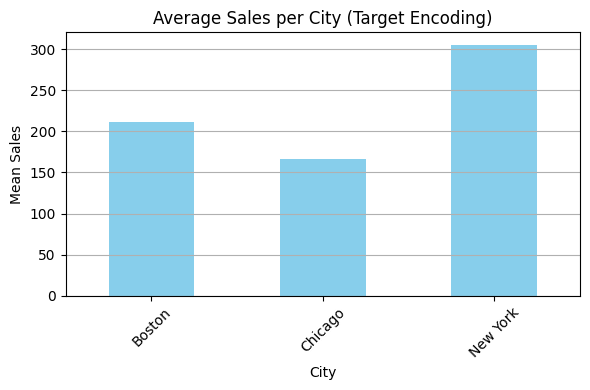

In [43]:
# Step 4: Visual comparison
print("Original vs Target Encoded Dataset:")
display(df, df_encoded)

# Step 5: Visualize average sales per city
plt.figure(figsize=(6, 4))
mean_sales_per_city.plot(kind='bar', color='skyblue')
plt.title('Average Sales per City (Target Encoding)')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise explored target encoding as a method to transform categorical variables into meaningful numeric representations. A dataset with a City column and corresponding Sales values was prepared, and the mean sales for each city were calculated. Each city was then replaced with its average sales, effectively compressing the categorical information into a single numeric signal. Comparing the original and encoded datasets made it clear how target encoding captures patterns in the data while maintaining interpretability. A bar chart was created to visualize the differences in average sales per city, reinforcing the numerical relationships. The exercise also highlighted the potential risks of data leakage if this encoding is applied improperly, emphasizing the need to compute means using only training data during modeling. Overall, this process demonstrated how target encoding can efficiently encode high-cardinality features while maintaining a strong connection to the target variable.

#### **Module 3.6: Feature Transformation and Scaling**

Many machine learning algorithms are sensitive to the **scale and distribution** of input features. Features with different units or magnitudes can bias distance-based models like k-NN or clustering, and may slow down convergence in optimization-based models like logistic regression or neural networks.

In this sub-module, you will learn how to transform and scale numerical features to ensure consistency and improve model performance. You’ll also learn when and why different scaling strategies are appropriate depending on the data distribution and model type.

**Common transformation and scaling techniques:**
- **Z-score standardization (StandardScaler)**:  
  - Rescales values to have mean 0 and standard deviation 1:  
    $
    z = \frac{x - \mu}{\sigma}
    $
  - Works well with normally distributed data.

- **Min-Max scaling (MinMaxScaler)**:  
  - Rescales values to a fixed range, typically [0, 1]:  
    $
    x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
    $
  - Sensitive to outliers, often used in neural networks.

- **Robust scaling (RobustScaler)**:  
  - Uses median and interquartile range instead of mean and std.  
  - More robust to outliers.

- **Log or square root transformation**:  
  - Helps reduce skewness and compress wide value ranges.

Applying appropriate scaling ensures your features contribute equally to the learning process, especially in algorithms that rely on geometric distance or gradient-based optimization.

---

#### **Exercise 15: Z-score Standardization with StandardScaler**

**Objective:**  
Understand how to apply Z-score standardization to numerical features using `StandardScaler`. This technique transforms features to have zero mean and unit variance, which is essential for many models that assume normally distributed inputs.

**Instructions:**  
1. Create a DataFrame with multiple numeric columns representing features with varying means and standard deviations.
2. Use `StandardScaler` from `sklearn.preprocessing` to standardize each column.
3. Compare summary statistics (`.mean()`, `.std()`) before and after scaling to confirm that the transformed features have mean ≈ 0 and std ≈ 1.
4. Visualize the distribution before and after standardization using histograms or boxplots.
5. Briefly comment on how standardization affects models that rely on geometric assumptions, like logistic regression or SVMs.

This exercise will help you understand how standardization ensures equal contribution of features during model training and improves model convergence in algorithms sensitive to feature scales.

---

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Create sample DataFrame
np.random.seed(42)
df = pd.DataFrame({
    'Feature_A': np.random.normal(100, 20, 100),
    'Feature_B': np.random.normal(500, 100, 100),
    'Feature_C': np.random.normal(5, 2, 100)
})

df.head()


,Feature_A,Feature_B,Feature_C
0,109.934283,358.462926,5.715575
1,97.234714,457.935468,6.121569
2,112.953771,465.728548,7.166102
3,130.460597,419.772273,7.107604
4,95.316933,483.871429,2.244661


In [45]:
# Step 2: Standardize features
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_array, columns=df.columns)

df_scaled.head()

,Feature_A,Feature_B,Feature_C
0,0.664619,-1.515115,0.271485
1,-0.038089,-0.466809,0.459646
2,0.831697,-0.384681,0.943743
3,1.800406,-0.868997,0.916631
4,-0.144206,-0.193479,-1.337135


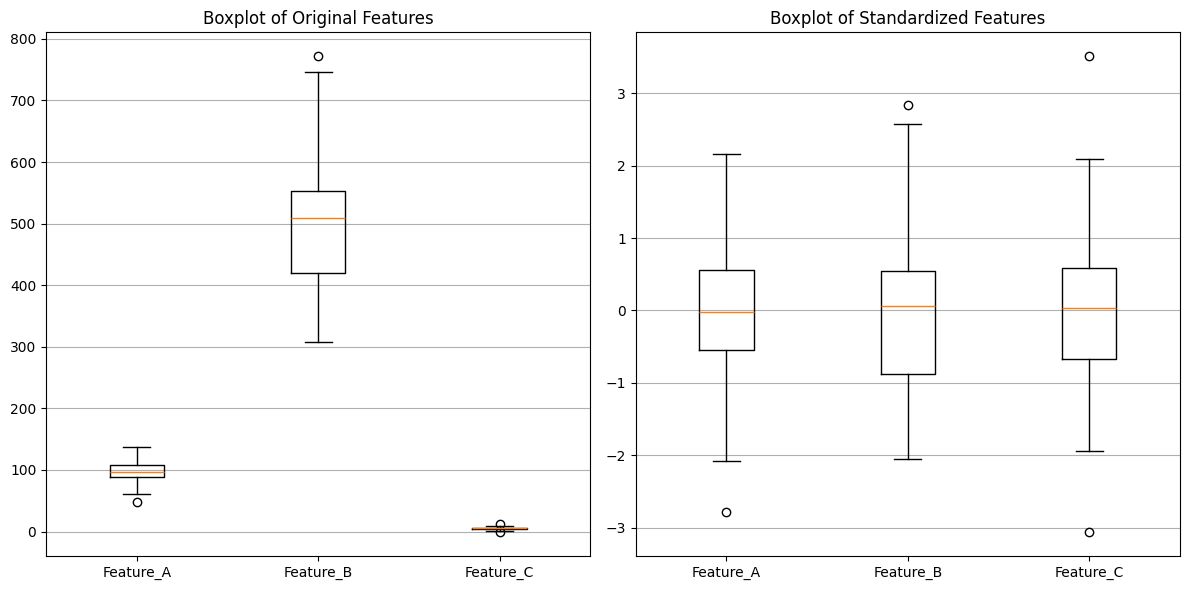

In [46]:
# Step 3: Create boxplots before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original data boxplot
axes[0].boxplot([df[col] for col in df.columns], tick_labels=df.columns)
axes[0].set_title("Boxplot of Original Features")
axes[0].grid(axis='y')

# Scaled data boxplot
axes[1].boxplot([df_scaled[col] for col in df_scaled.columns], tick_labels=df_scaled.columns)
axes[1].set_title("Boxplot of Standardized Features")
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise focused on standardizing numerical features using Z-score standardization to ensure they contribute equally to machine learning models. A dataset with features having different means and ranges was prepared, highlighting how raw data can vary in scale. StandardScaler was applied to transform each feature, resulting in values with approximately zero mean and unit variance. Comparing the summary statistics and boxplots before and after scaling illustrated how standardization compresses differences in magnitude while preserving the overall distribution. Visualizing the transformation made it clear that features are now on the same scale, which is especially important for models like logistic regression or SVM that rely on distance or gradient-based optimization. The exercise reinforced the importance of scaling to improve model convergence and prevent features with larger ranges from dominating the learning process. Overall, it demonstrated that proper feature transformation can make a significant difference in both model performance and stability.

#### **Exercise 16: Min-Max Scaling for Normalization**

**Objective:**  
Learn how to rescale numerical features using **Min-Max normalization**, which transforms each feature to a fixed range, usually [0, 1]. This is especially useful for neural networks or models that assume bounded input values.

**Instructions:**  
1. Create a sample DataFrame with at least three numerical features (e.g., income, expenses, and savings).
2. Apply **MinMaxScaler** from `sklearn.preprocessing` to normalize the features to the [0, 1] range.
3. Plot boxplots **before and after** scaling to visualize how the transformation compresses the feature values.
4. Optionally, compute and display the `.min()` and `.max()` of each column after scaling to confirm the result.

Min-max scaling preserves the shape of the original distribution but compresses values to a consistent scale. It is sensitive to outliers and works best when the data has known minimum and maximum bounds.

---

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Step 1: Create sample data
np.random.seed(2)
df = pd.DataFrame({
    'Income': np.random.randint(30000, 100000, size=100),
    'Expenses': np.random.randint(10000, 50000, size=100),
    'Savings': np.random.randint(1000, 20000, size=100)
})

df.head()


,Income,Expenses,Savings
0,74566,44011,8771
1,61019,26680,15579
2,63867,34507,8078
3,74295,12539,12710
4,83922,34142,12501


In [48]:
# Step 2: Apply Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()

,Income,Expenses,Savings
0,0.626172,0.851402,0.405187
1,0.422568,0.416376,0.767007
2,0.465372,0.612842,0.368357
3,0.622099,0.061422,0.614530
4,0.766788,0.603680,0.603423


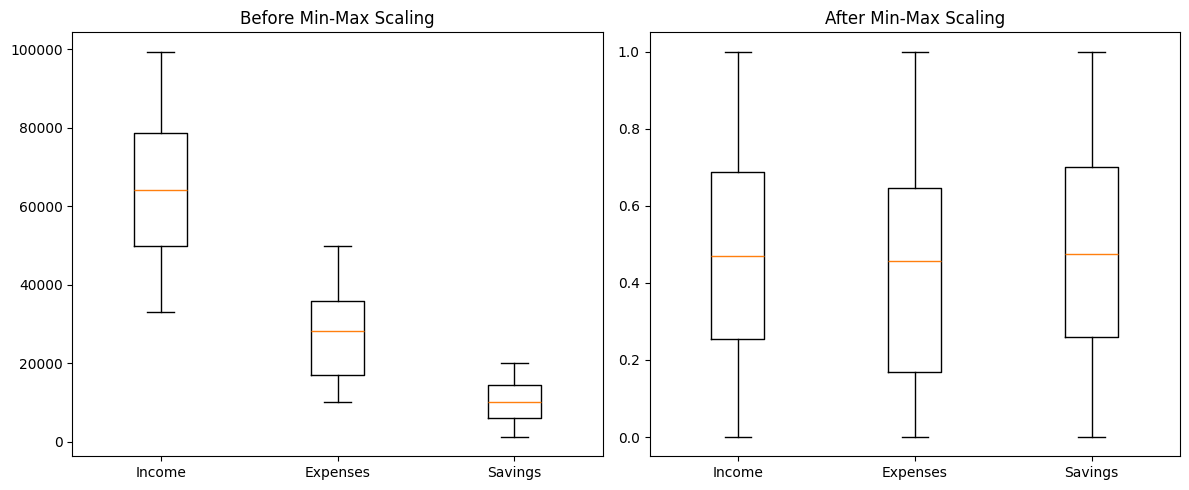

(            Income      Expenses       Savings
 count    100.00000    100.000000    100.000000
 mean   64951.76000  27768.050000  10170.530000
 std    17741.00492  11315.884526   5181.904654
 min    32903.00000  10092.000000   1147.000000
 25%    49754.75000  16850.000000   6042.500000
 50%    64154.00000  28271.000000  10078.000000
 75%    78632.75000  35808.000000  14322.250000
 max    99439.00000  49931.000000  19963.000000,
            Income    Expenses     Savings
 count  100.000000  100.000000  100.000000
 mean     0.481675    0.443687    0.479567
 std      0.266638    0.284040    0.275399
 min      0.000000    0.000000    0.000000
 25%      0.253273    0.169633    0.260178
 50%      0.469686    0.456312    0.474649
 75%      0.687293    0.645498    0.700215
 max      1.000000    1.000000    1.000000)

In [49]:
# Step 3: Plot before and after scaling using boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].boxplot([df[col] for col in df.columns], tick_labels=df.columns)
axes[0].set_title("Before Min-Max Scaling")

axes[1].boxplot([df_scaled[col] for col in df_scaled.columns], tick_labels=df_scaled.columns)
axes[1].set_title("After Min-Max Scaling")

plt.tight_layout()
plt.show()

df.describe(), df_scaled.describe()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise focused on normalizing numerical features using Min-Max scaling to bring all values into a consistent range between 0 and 1. A dataset with features like income, expenses, and savings was prepared, highlighting the natural differences in magnitude between columns. MinMaxScaler was applied to compress all features to the [0, 1] range while preserving their original distributions. Boxplots before and after scaling clearly illustrated how the values were transformed, showing that the relative ordering of data points remained intact. Summary statistics confirmed that all scaled features now shared the same minimum and maximum bounds, making them comparable. This technique is particularly useful for algorithms sensitive to input ranges, such as neural networks, where unscaled features could dominate the learning process. Overall, the exercise reinforced the importance of scaling for consistent model behavior and easier convergence during training.

#### **Robust Scaling**

Robust Scaling is a normalization technique that transforms features by removing the **median** and scaling them according to the **interquartile range (IQR)** — the range between the 25th and 75th percentiles. This approach is more resilient to **outliers**, unlike standard scaling (which uses mean and standard deviation) or Min-Max scaling (which uses min and max values).

**Formula:**

$
X_{\text{scaled}} = \frac{X - \text{Median}(X)}{\text{IQR}(X)}
$

Where:
- **Median(X)** is the 50th percentile (middle value)
- **IQR(X)** = 75th percentile - 25th percentile

Robust scaling is especially useful when:
- The data has many **outliers**
- You don’t want extreme values to overly influence the scale
- The model you’re using is **not sensitive to the actual range** but benefits from normalized spread (e.g., linear models, clustering)

This makes it a preferred choice in preprocessing pipelines when working with skewed or heavy-tailed distributions.


---

#### **Exercise 17: Robust Scaling to Handle Outliers**

**Objective:**  
Learn how to scale features using **RobustScaler**, which uses the median and interquartile range (IQR) instead of mean and standard deviation. This method is particularly effective when the dataset contains outliers, as it reduces their influence on the scaling process.

**Instructions:**  
1. Create a DataFrame with numeric features that include some extreme outlier values (e.g., Salary, Bonus).
2. Use `RobustScaler` from `sklearn.preprocessing` to scale the data.
3. Plot boxplots before and after scaling to visually assess how outliers are handled.
4. Compare the statistical summary (`.describe()`) of original and scaled data to understand the effect of the transformation.
5. Discuss when Robust Scaling is more appropriate than Min-Max or Z-score scaling.

This exercise will help you understand how scaling methods that rely on medians and IQRs can offer more reliable transformations in datasets with extreme values.

---

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Step 1: Create sample dataset with outliers
np.random.seed(42)
data = {
    'Revenue': np.append(np.random.normal(1000, 200, 45), [5000, 5200, 5500, 5800, 6000]),
    'Employees': np.append(np.random.normal(50, 10, 45), [200, 220, 250, 280, 300]),
    'Years_in_Business': np.append(np.random.normal(10, 2, 45), [30, 35, 40, 45, 50])
}
df = pd.DataFrame(data)

df.head()


,Revenue,Employees,Years_in_Business
0,1099.342831,42.801558,10.194155
1,972.347140,45.393612,11.937290
2,1129.537708,60.571222,8.595894
3,1304.605971,53.436183,9.344676
4,953.169325,32.369598,9.215784


In [51]:
# Step 2: Apply Robust Scaling
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.describe(), df_scaled.describe()

(           Revenue   Employees  Years_in_Business
 count    50.000000   50.000000          50.000000
 mean   1411.076349   70.167635          12.884058
 std    1393.044850   62.321199           9.579713
 min     608.065975   23.802549           6.162458
 25%     879.712074   45.038887           8.898816
 50%     974.608742   53.264175          10.065344
 75%    1124.281283   59.644789          11.421328
 max    6000.000000  300.000000          50.000000,
          Revenue  Employees  Years_in_Business
 count  50.000000  50.000000          50.000000
 mean    1.784638   1.157303           1.117423
 std     5.695913   4.266850           3.797687
 min    -1.498728  -2.017104          -1.547222
 25%    -0.388016  -0.563148          -0.462447
 50%     0.000000   0.000000           0.000000
 75%     0.611984   0.436852           0.537553
 max    20.547931  16.892885          15.831302)

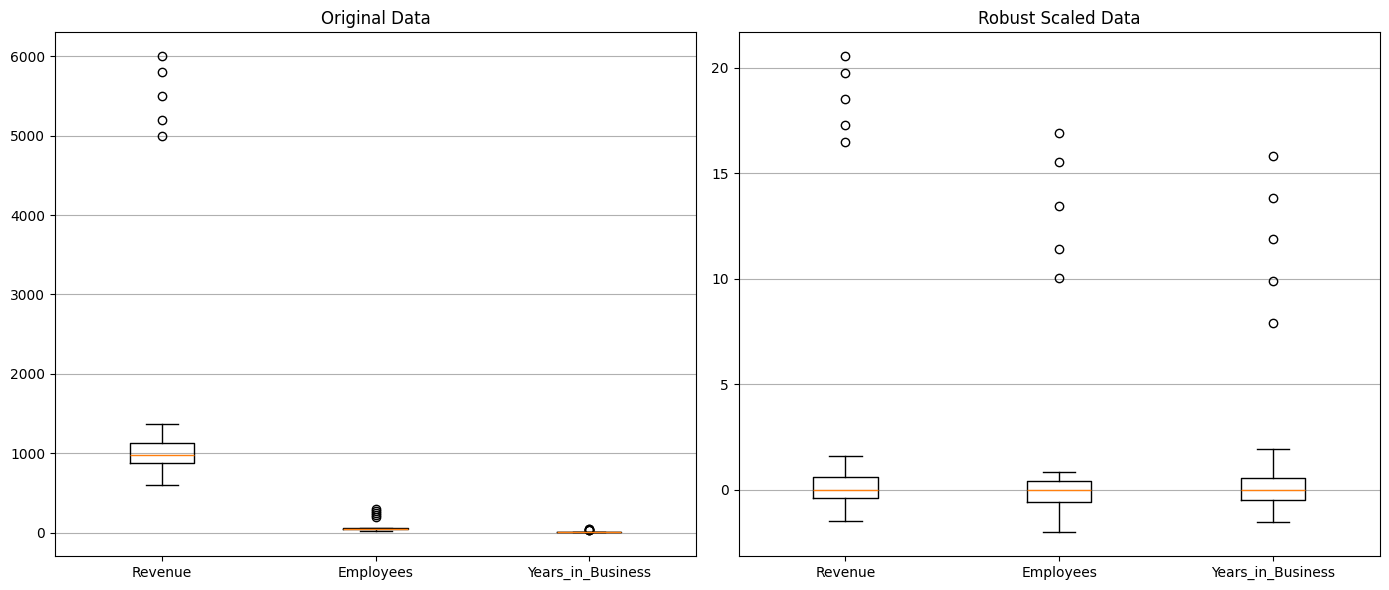

In [52]:
# Step 3: Plot original vs. scaled boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
axes[0].boxplot([df[col] for col in df.columns], tick_labels=df.columns)
axes[0].set_title('Original Data')
axes[0].grid(axis='y')

axes[1].boxplot([df_scaled[col] for col in df_scaled.columns], tick_labels=df_scaled.columns)
axes[1].set_title('Robust Scaled Data')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()



---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise demonstrated how Robust Scaling can be applied to features containing extreme outliers, such as revenue, employees, and years in business. A dataset with both typical values and extreme outliers was prepared, highlighting the challenges that outliers pose for traditional scaling methods. Applying RobustScaler centered the features around the median and scaled them according to the interquartile range, reducing the influence of extreme values. Boxplots before and after scaling showed that the main bulk of the data became more comparable, while the outliers no longer dominated the scale. Summary statistics confirmed that the transformation maintained the relative distribution of most data points without being skewed by extremes. This method is particularly effective when outliers are present and preserving the data’s overall structure is important. Overall, the exercise reinforced how choosing the right scaling technique depends on the data distribution and the presence of outliers.

#### **Exercise 18: Log and Square Root Transformations to Reduce Skewness**

**Objective:**  
Learn how to use **logarithmic** and **square root** transformations to reduce skewness in highly skewed distributions. This is helpful for compressing wide value ranges and making the data more normally distributed — which benefits many machine learning algorithms that assume or perform better with symmetric distributions.

**Instructions:**  
1. Create a synthetic dataset with **positively skewed** data (e.g., use an exponential distribution).
2. Plot a histogram of the original feature to show its skewness.
3. Apply a **log transformation** using `np.log1p()` to handle zero or small values.
4. Apply a **square root transformation** using `np.sqrt()`.
5. Plot histograms for both transformed versions.
6. Compare the skewness of the original and transformed data using `.skew()`.
7. Comment on which transformation reduces skewness more effectively and when each is preferable.

This exercise will help you understand how and when to apply non-linear transformations to correct skewed features and prepare them for modeling.

---

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create skewed data
np.random.seed(42)
data = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame({'Original': data})

df.head()


,Original
0,0.938536
1,6.020243
2,2.633491
3,1.825885
4,0.339250


In [54]:
# Step 2: Apply transformations
df['Log_Transformed'] = np.log1p(df['Original'])
df['Sqrt_Transformed'] = np.sqrt(df['Original'])

df.head()

,Original,Log_Transformed,Sqrt_Transformed
0,0.938536,0.661933,0.968781
1,6.020243,1.948798,2.453618
2,2.633491,1.290194,1.622804
3,1.825885,1.038822,1.351253
4,0.339250,0.292110,0.582451


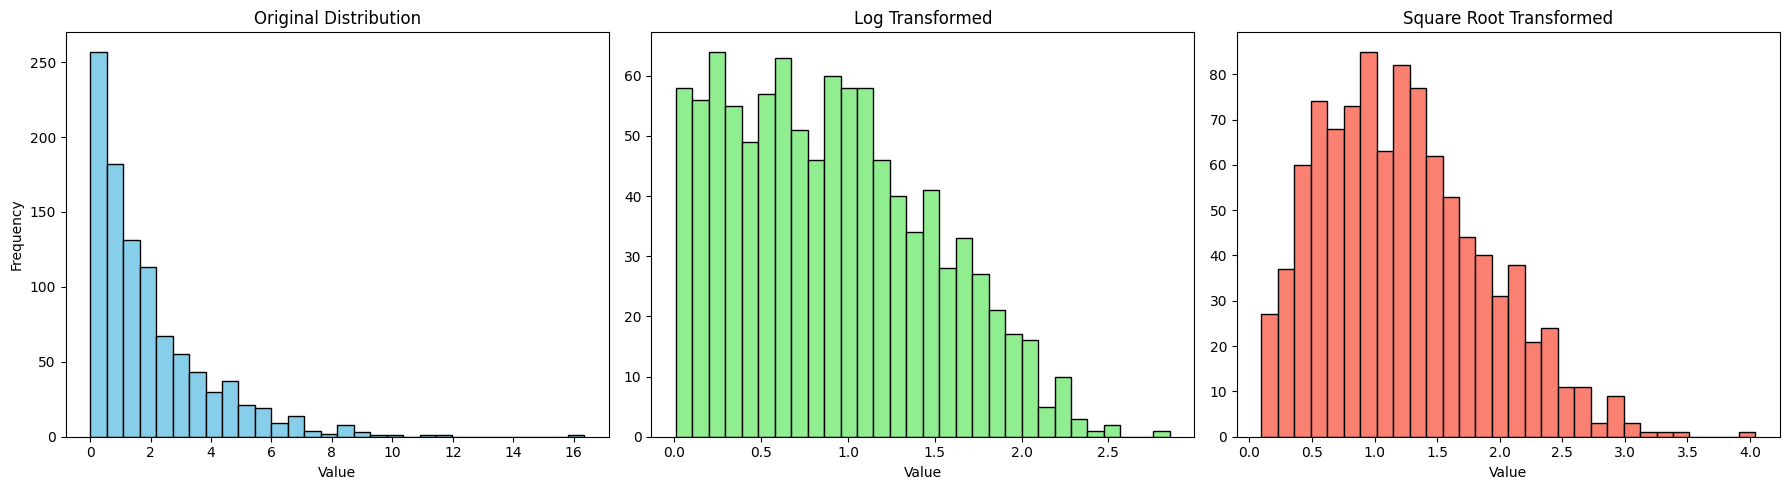

In [55]:
# Step 3: Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(df['Original'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Original Distribution')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Log_Transformed'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Log Transformed')
axes[1].set_xlabel('Value')

axes[2].hist(df['Sqrt_Transformed'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Square Root Transformed')
axes[2].set_xlabel('Value')

plt.tight_layout()
plt.show()


In [56]:
# Step 4: Calculate skewness
skewness_results = df.skew().rename('Skewness')
skewness_results

,Skewness
Original,1.867837
Log_Transformed,0.429006
Sqrt_Transformed,0.598586


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise focused on reducing skewness in a positively skewed dataset using logarithmic and square root transformations. A synthetic dataset was created using an exponential distribution, which clearly demonstrated the long right tail in the histogram. Applying a log transformation compressed the larger values more effectively, while the square root transformation also reduced skewness but to a lesser degree. Histograms and skewness calculations confirmed that the log-transformed data became much closer to a symmetric distribution, making it more suitable for models that assume normality. This process highlighted how non-linear transformations can help stabilize variance and bring extreme values closer to the center. Choosing the right transformation depends on the degree of skewness and the presence of small or zero values in the data. Overall, the exercise reinforced the importance of preparing features so that models can learn patterns more reliably.

#### **Module 3.7: Discretization and Binning**

Discretization (also called binning) is the process of converting continuous numerical variables into discrete categorical intervals. This can simplify model interpretation, reduce noise, and even improve performance in some rule-based or tree-based models.

In this sub-module, you’ll learn how to group continuous values into bins using different strategies and when it's appropriate to do so. Binning is also useful for transforming non-linear relationships and preparing features for algorithms that handle categorical inputs better.

**Common binning strategies:**
- **Equal-width binning**:  
  - Divides the range of a variable into bins of equal size.
  - Example: age 0–100 split into 5 bins → [0–20), [20–40), etc.
  - Use `pd.cut()`.

- **Quantile-based binning**:  
  - Each bin contains approximately the same number of observations.
  - Good for dealing with skewed distributions.
  - Use `pd.qcut()`.

- **Custom binning**:  
  - Manually define breakpoints based on domain knowledge.
  - Useful when bins represent meaningful categories (e.g., age groups: child, adult, senior).

**When to use binning:**
- To improve model interpretability.
- To reduce the impact of small fluctuations in continuous data.
- To create categorical interaction features for tree-based models.

Discretization is not always beneficial — some models (like linear regression) may lose predictive power with binned data. Use it carefully and validate its impact on performance.

---

#### Exercise 19: Equal-Width Binning of Continuous Variables

**Objective:**  
Learn how to apply equal-width binning to a continuous variable and explore how binning transforms the variable's structure and summary statistics.

**Instructions:**  
1. Generate a synthetic dataset with a continuous feature, such as income or age, using a normal distribution.
2. Use `pd.cut()` to divide the continuous variable into equal-width bins (e.g., 4 or 5 bins).
3. Add a new column to the DataFrame to store the binned category labels.
4. Print the frequency count of each bin to observe the distribution across intervals.
5. Visualize the binned data using a bar plot or histogram for the new categorical feature.
6. Compare the summary statistics and visualizations before and after binning.

This exercise demonstrates how equal-width binning works, how it segments data uniformly across value ranges, and how it may affect the interpretability and modeling of continuous features.

---

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a synthetic dataset
np.random.seed(42)
data = {
    'Age': np.random.normal(loc=40, scale=12, size=100)  # simulate ages with a normal distribution
}
df = pd.DataFrame(data)

df.head()


,Age
0,45.960570
1,38.340828
2,47.772262
3,58.276358
4,37.190160


In [58]:
# Step 2: Apply equal-width binning using pd.cut()
num_bins = 5
df['Age_Binned'] = pd.cut(df['Age'], bins=num_bins)

# Step 3: Print frequency of each bin
print("Bin counts:")
print(df['Age_Binned'].value_counts().sort_index())


Bin counts:
Age_Binned
(8.509, 19.296]      5
(19.296, 30.029]    14
(30.029, 40.762]    36
(40.762, 51.494]    32
(51.494, 62.227]    13
Name: count, dtype: int64


In [59]:
# Step 4: Summary statistics before and after binning
print("\nOriginal Age Statistics:")
print(df['Age'].describe())

print("\nBinned Age Categories:")
print(df['Age_Binned'].unique())



Original Age Statistics:
count    100.000000
mean      38.753842
std       10.898021
min        8.563059
25%       32.789132
50%       38.476524
75%       44.871425
max       62.227338
Name: Age, dtype: float64

Binned Age Categories:
[(40.762, 51.494], (30.029, 40.762], (51.494, 62.227], (8.509, 19.296], (19.296, 30.029]]
Categories (5, interval[float64, right]): [(8.509, 19.296] < (19.296, 30.029] < (30.029, 40.762] <
                                           (40.762, 51.494] < (51.494, 62.227]]


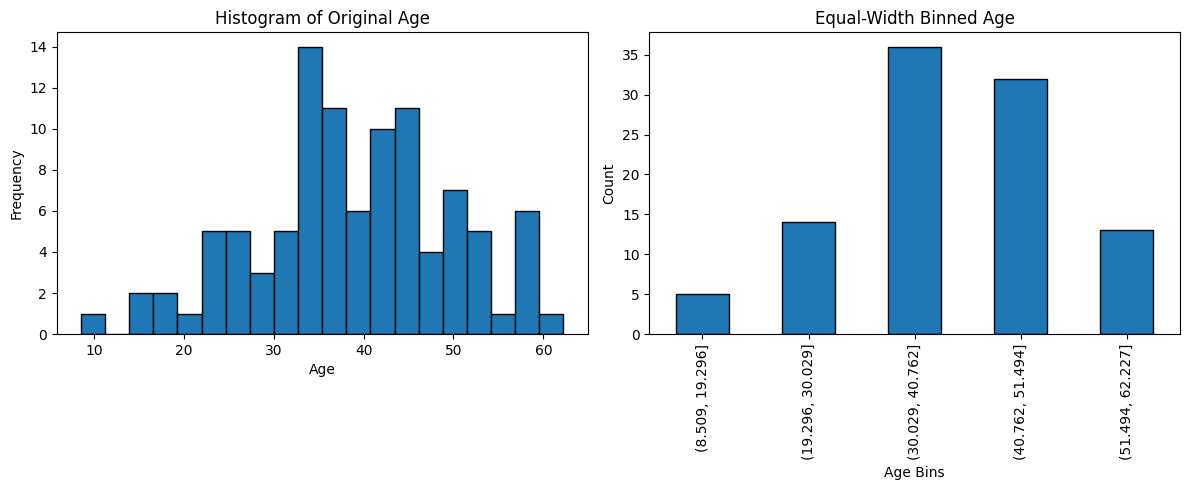

In [60]:
# Step 5: Plot histogram of the original continuous variable
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Histogram of Original Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Step 6: Plot bar plot for binned categories
plt.subplot(1, 2, 2)
df['Age_Binned'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Equal-Width Binned Age')
plt.xlabel('Age Bins')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored how to transform a continuous variable into discrete intervals using equal-width binning. We started by creating a synthetic dataset of ages with a normal distribution to simulate real-world continuous data. Using pd.cut(), we divided the ages into five equal-width bins and added them as a new categorical column. Examining the frequency of each bin helped us understand how the data was distributed across the intervals, while comparing summary statistics before and after binning showed how numeric detail is replaced with broader categories. Visualizing the original ages with a histogram and the binned categories with a bar plot made it clear how binning simplifies the data and highlights general patterns. This exercise reinforced that equal-width binning can improve interpretability and reduce noise, but we also learned that it may hide some granular information. Overall, it was a helpful way to see how continuous features can be discretized for certain types of models or analyses.

#### Exercise 20: Quantile-Based Binning with `pd.qcut()`

**Objective:**  
Learn how to apply quantile-based binning to create balanced categories from a skewed distribution. This technique ensures each bin has approximately the same number of observations, which is especially helpful when dealing with non-uniform data.

**Instructions:**  
1. Generate a skewed distribution using an exponential distribution with NumPy (e.g., `np.random.exponential(scale=2.0, size=1000)`).
2. Create a DataFrame and apply `pd.qcut()` to divide the data into 4 quantile-based bins.
3. Print the bin edges and number of records in each bin to confirm equal distribution.
4. Visualize the results with a bar plot of bin counts and compare it with the original skewed histogram.
5. Discuss how quantile binning differs from equal-width binning and when it might be more appropriate.

This exercise shows how `qcut()` is a powerful tool when working with skewed data because it ensures uniformity in bin sizes by distribution rather than value range.

---

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate skewed data using exponential distribution
np.random.seed(42)
data = np.random.exponential(scale=2.0, size=1000)
df = pd.DataFrame({'Skewed_Data': data})

df.head()


,Skewed_Data
0,0.938536
1,6.020243
2,2.633491
3,1.825885
4,0.339250


In [62]:
# Step 2: Apply quantile-based binning using pd.qcut
df['Quantile_Bin'], bin_edges = pd.qcut(df['Skewed_Data'], q=4, retbins=True, labels=["Q1", "Q2", "Q3", "Q4"])

# Step 3: Display bin counts
bin_counts = df['Quantile_Bin'].value_counts().sort_index()

df[['Skewed_Data', 'Quantile_Bin']].head()

,Skewed_Data,Quantile_Bin
0,0.938536,Q2
1,6.020243,Q4
2,2.633491,Q3
3,1.825885,Q3
4,0.339250,Q1


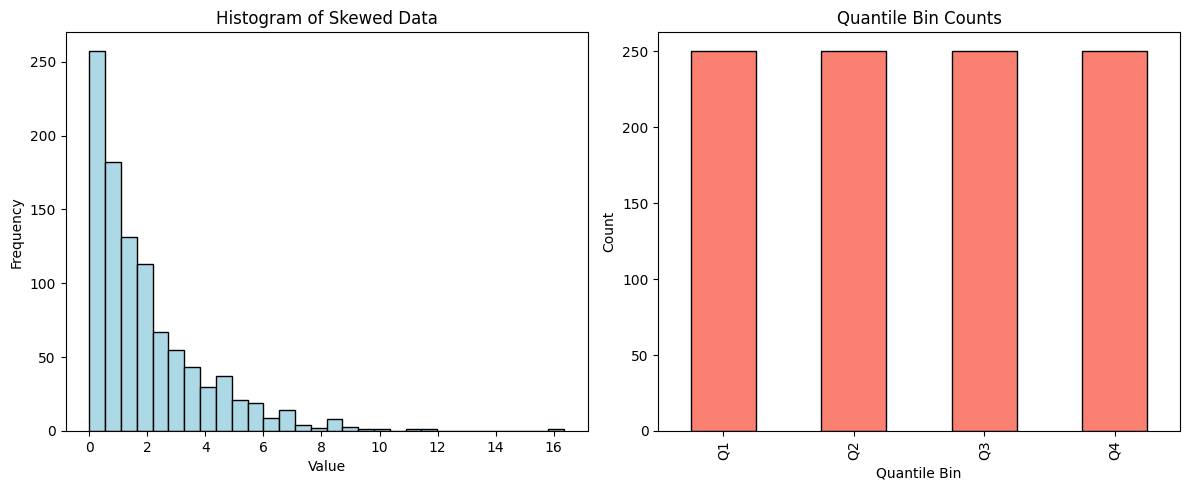

In [63]:
# Step 4: Plot original histogram and bin counts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original histogram
axes[0].hist(df['Skewed_Data'], bins=30, color='lightblue', edgecolor='black')
axes[0].set_title('Histogram of Skewed Data')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Bin count bar plot
bin_counts.plot(kind='bar', color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Quantile Bin Counts')
axes[1].set_xlabel('Quantile Bin')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Exercise 21: Custom Binning with Domain Knowledge**

**Objective:**  
Learn how to discretize a continuous variable using custom bins based on real-world domain knowledge. This method is helpful when you want to assign meaningful labels to different value ranges — such as age groups or income brackets — for better model interpretability or communication.

**Instructions:**  
1. Create a synthetic dataset simulating customer ages using `np.random.randint()`, ranging from 0 to 90.
2. Define custom bin edges based on age categories:
   - 0–12: Child
   - 13–19: Teen
   - 20–39: Young Adult
   - 40–64: Adult
   - 65+: Senior
3. Use `pd.cut()` to bin the `Age` variable according to these intervals.
4. Add a new column `Age_Group` that stores the labeled category.
5. Plot a bar chart of counts per age group.
6. Print a sample of the DataFrame and describe the group distribution.

This exercise helps demonstrate how custom bins derived from domain logic or policy definitions can add interpretability and structure to continuous data, especially in business, healthcare, and education applications.

---

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a synthetic dataset of customer ages
np.random.seed(42)
df = pd.DataFrame({'Age': np.random.randint(0, 91, size=200)})

df.head()


,Age
0,51
1,14
2,71
3,60
4,20


In [65]:
# Step 2: Define custom bins and labels
bins = [0, 12, 19, 39, 64, 90]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Step 3: Apply pd.cut to assign age groups
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Display sample and group distribution
df_sample = df.head(10)
age_group_counts_summary = df['Age_Group'].value_counts(normalize=True).sort_index()

df_sample, age_group_counts_summary

(   Age    Age_Group
 0   51        Adult
 1   14         Teen
 2   71       Senior
 3   60        Adult
 4   20  Young Adult
 5   82       Senior
 6   86       Senior
 7   74       Senior
 8   74       Senior
 9   87       Senior,
 Age_Group
 Child          0.155
 Teen           0.055
 Young Adult    0.200
 Adult          0.325
 Senior         0.265
 Name: proportion, dtype: float64)

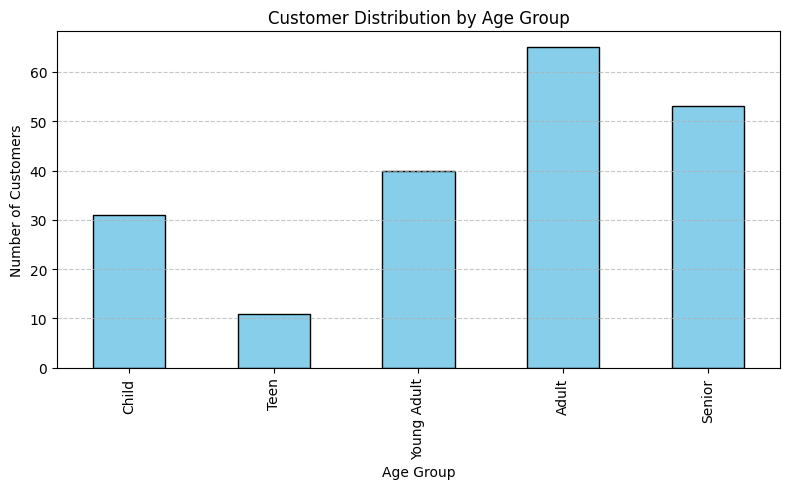

In [66]:
# Step 4: Plot a bar chart of age group distribution
age_group_counts = df['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we learned how to use domain knowledge to create meaningful custom bins for continuous data. We started by generating a synthetic dataset of customer ages and then defined age categories like Child, Teen, Young Adult, Adult, and Senior based on real-world conventions. Using pd.cut(), we assigned each customer to the appropriate age group and added this information as a new column. Exploring the frequency and proportion of each age group helped us understand the distribution of our dataset, while the bar chart provided a clear visual summary of how customers are spread across different life stages. This exercise highlighted how custom binning not only simplifies continuous data but also adds interpretability, making it easier to communicate insights in business or policy contexts. Overall, it reinforced the idea that combining data with domain knowledge can make analysis more meaningful and actionable.

#### **Module 3.8: Feature Construction and Polynomial Expansion**

Sometimes, raw features aren’t enough to capture the underlying patterns in data. Feature construction involves creating new variables from existing ones to expose hidden relationships, enhance signal, or simplify model learning. This is a creative and powerful step in the preprocessing pipeline.

In this sub-module, you’ll learn how to build new features manually or automatically by combining variables, applying mathematical functions, or creating interaction terms. You’ll also explore polynomial expansion techniques that allow models to learn non-linear relationships from linear input data.

**Common feature construction techniques:**
- **Mathematical transformations**:  
  - Apply log, square root, or square functions to reduce skewness or highlight variance.
- **Interaction terms**:  
  - Multiply or combine two or more features (e.g., `price * quantity` → revenue).
- **Polynomial features** (via `PolynomialFeatures` in scikit-learn):  
  - Generate higher-degree versions of features (e.g., $ x, x^2, x^3 $ to allow linear models to capture non-linear trends.

**Use cases:**
- Enhance predictive power when domain knowledge suggests important combinations.
- Enable linear models to fit curves using polynomial terms.
- Improve tree model performance by introducing more discriminative splits.

Feature engineering is a blend of intuition, experimentation, and automation — and can dramatically improve model outcomes when done thoughtfully.

---

#### **Exercise 22: Constructing Features with Mathematical Transformations**

**Objective:**  
Learn how to create new features using basic mathematical transformations such as logarithmic, square root, and squared values. These transformations help reduce skewness, normalize scale, and highlight important patterns in the data.

**Instructions:**  
1. Create a synthetic dataset simulating financial or customer data with variables like `Income`, `Spending`, and `Debt`.
2. Construct the following transformed features:
   - `Log_Income` using the natural logarithm of income.
   - `Spending_Sqrt` as the square root of the spending values.
   - `Debt_Squared` as the squared values of debt.
3. Add the transformed columns to the original DataFrame.
4. Use histograms to compare the original vs. transformed distributions.
5. Use `.describe()` to examine the summary statistics before and after transformation.

These transformations are particularly useful when your features have skewed distributions or wide value ranges that could affect model performance or violate assumptions of linear models.

---

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a synthetic dataset
np.random.seed(42)
data = {
    'Income': np.random.exponential(scale=50000, size=100),
    'Spending': np.random.normal(loc=2000, scale=500, size=100),
    'Debt': np.random.exponential(scale=10000, size=100)
}
df = pd.DataFrame(data)

df.head()


,Income,Spending,Debt
0,23463.404499,2043.523534,15838.252527
1,150506.071546,1850.496325,6984.353244
2,65837.284677,2045.880388,8601.559026
3,45647.127689,1006.215543,6782.934333
4,8481.243523,1890.164056,2172.148953


In [68]:
# Step 2: Apply mathematical transformations
df['Log_Income'] = np.log1p(df['Income'])  # log(1 + x) to avoid log(0)
df['Spending_Sqrt'] = np.sqrt(np.abs(df['Spending']))
df['Debt_Squared'] = df['Debt'] ** 2

df.head()

,Income,Spending,Debt,Log_Income,Spending_Sqrt,Debt_Squared
0,23463.404499,2043.523534,15838.252527,10.063240,45.205349,2.508502e+08
1,150506.071546,1850.496325,6984.353244,11.921765,43.017396,4.878119e+07
2,65837.284677,2045.880388,8601.559026,11.094957,45.231409,7.398682e+07
3,45647.127689,1006.215543,6782.934333,10.728718,31.720901,4.600820e+07
4,8481.243523,1890.164056,2172.148953,9.045730,43.476017,4.718231e+06


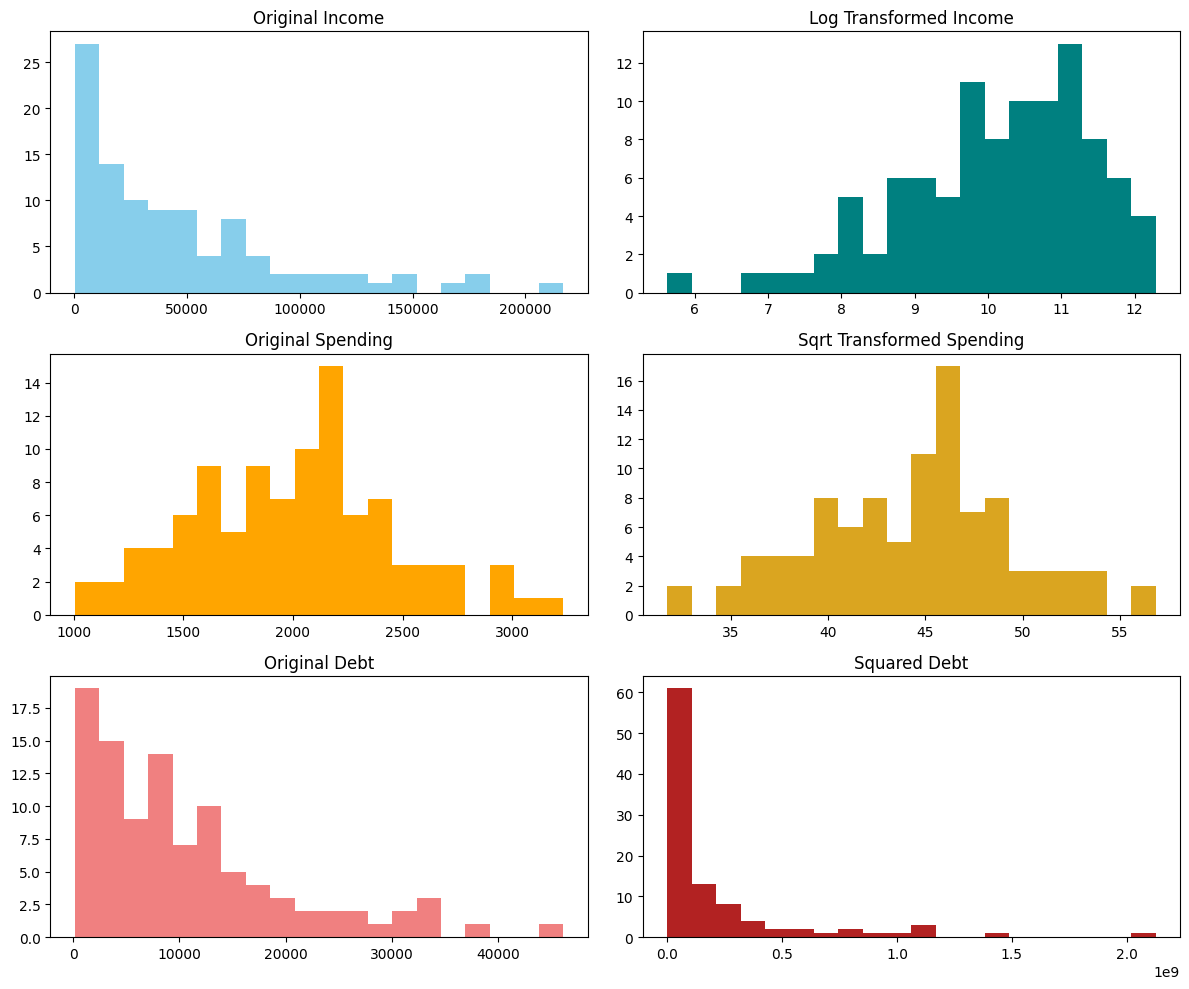

(              Income     Spending          Debt
 count     100.000000   100.000000    100.000000
 mean    45737.401952  1999.459820  10620.911094
 std     45989.280067   456.464679   9607.740628
 min       276.871019  1006.215543    155.773154
 25%     10734.908543  1647.436163   3450.792283
 50%     31200.020531  2038.902511   7895.426170
 75%     65504.663068  2241.845774  14981.922685
 max    216707.316979  3231.621056  46105.697478,
        Log_Income  Spending_Sqrt  Debt_Squared
 count  100.000000     100.000000  1.000000e+02
 mean    10.114639      44.420875  2.041893e+08
 std      1.300382       5.148864  3.499645e+08
 min      5.627157      31.720901  2.426528e+04
 25%      9.280957      40.588608  1.190982e+07
 50%     10.347915      45.154179  6.234301e+07
 75%     11.089888      47.348048  2.247024e+08
 max     12.286308      56.847349  2.125735e+09)

In [69]:
# Step 3: Histograms before and after transformations
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.ravel()

axes[0].hist(df['Income'], bins=20, color='skyblue')
axes[0].set_title('Original Income')

axes[1].hist(df['Log_Income'], bins=20, color='teal')
axes[1].set_title('Log Transformed Income')

axes[2].hist(df['Spending'], bins=20, color='orange')
axes[2].set_title('Original Spending')

axes[3].hist(df['Spending_Sqrt'], bins=20, color='goldenrod')
axes[3].set_title('Sqrt Transformed Spending')

axes[4].hist(df['Debt'], bins=20, color='lightcoral')
axes[4].set_title('Original Debt')

axes[5].hist(df['Debt_Squared'], bins=20, color='firebrick')
axes[5].set_title('Squared Debt')

plt.tight_layout()
plt.show()

# Step 4: Summary statistics
original_stats = df[['Income', 'Spending', 'Debt']].describe()
transformed_stats = df[['Log_Income', 'Spending_Sqrt', 'Debt_Squared']].describe()

original_stats, transformed_stats

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored how to create new features using basic mathematical transformations to better capture patterns in the data. We started by generating a synthetic dataset with financial variables like Income, Spending, and Debt. Then, we applied logarithmic, square root, and squared transformations to these features to reduce skewness, normalize ranges, and highlight differences that might be hidden in the original data. By comparing histograms and summary statistics before and after transformation, we could clearly see how the distributions changed and became easier for models to handle. This process reinforced how simple transformations can make a big difference in preparing data for analysis or modeling. Overall, I learned that feature construction isn’t just about adding columns, it’s about thoughtfully enhancing the data to reveal patterns and relationships that improve predictive performance. It also showed the importance of visualizing changes to understand their real impact.

#### **Exercise 23: Creating Interaction Features and Ratios**

**Objective:**  
Learn how to engineer new features by combining existing variables using multiplication, division, or arithmetic operations. This practice can expose important relationships and enhance the signal for predictive models.

**Instructions:**  
1. Load the sample **`diamonds`** dataset from seaborn. Focus on the following numerical columns: `carat`, `depth`, `table`, `x`, `y`, `z`, and `price`.
2. Construct new interaction features:
   - **Carat per price**: ratio of `carat` to `price`
   - **Volume**: multiply dimensions `x`, `y`, and `z` to approximate the diamond’s volume
   - **Table-to-depth ratio**: divide `table` by `depth`
3. Add these new features to your DataFrame.
4. Visualize their distributions using histograms or boxplots.
5. Use `.corr()` or a heatmap to assess how these new features relate to `price`.

This exercise helps you practice combining features meaningfully based on domain logic. Creating ratios and interaction terms can significantly improve model learning, especially when features are not independently informative.

---

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diamonds dataset
df = sns.load_dataset('diamonds')

# Keep only the relevant numerical columns
df = df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

df.head()


,carat,depth,table,x,y,z,price
0,0.23,61.5,55.0,3.95,3.98,2.43,326
1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,0.23,56.9,65.0,4.05,4.07,2.31,327
3,0.29,62.4,58.0,4.20,4.23,2.63,334
4,0.31,63.3,58.0,4.34,4.35,2.75,335


In [71]:
# Feature construction
df['carat_per_price'] = df['carat'] / df['price']
df['volume'] = df['x'] * df['y'] * df['z']
df['table_to_depth_ratio'] = df['table'] / df['depth']

df.head()


,carat,depth,table,x,y,z,price,carat_per_price,volume,table_to_depth_ratio
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0.000706,38.202030,0.894309
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0.000644,34.505856,1.020067
2,0.23,56.9,65.0,4.05,4.07,2.31,327,0.000703,38.076885,1.142355
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0.000868,46.724580,0.929487
4,0.31,63.3,58.0,4.34,4.35,2.75,335,0.000925,51.917250,0.916272


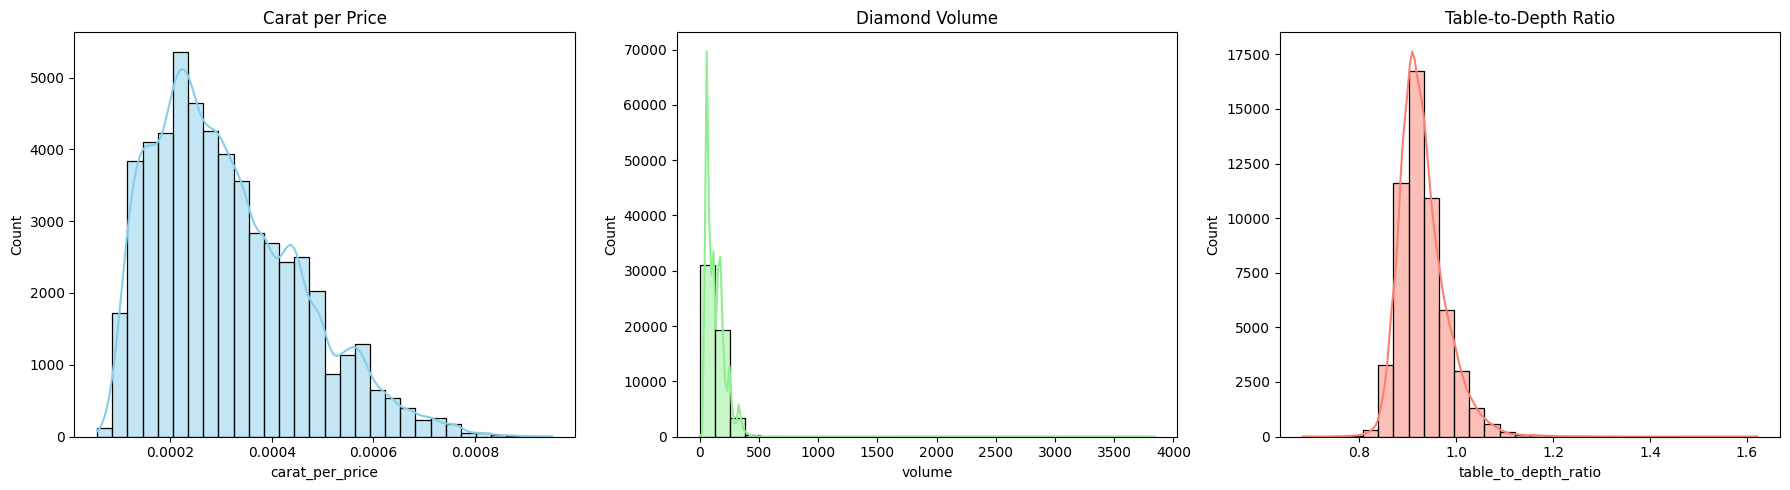

In [72]:
# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['carat_per_price'], bins=30, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Carat per Price')

sns.histplot(df['volume'], bins=30, ax=axes[1], kde=True, color='lightgreen')
axes[1].set_title('Diamond Volume')

sns.histplot(df['table_to_depth_ratio'], bins=30, ax=axes[2], kde=True, color='salmon')
axes[2].set_title('Table-to-Depth Ratio')

plt.tight_layout()
plt.show()


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we focused on creating new features by combining existing ones to uncover hidden relationships in the data. We started by loading the diamonds dataset and selecting key numerical columns like carat, dimensions, and price. Then, we constructed interaction features such as carat-per-price, the diamond’s approximate volume, and the table-to-depth ratio, which reflect meaningful characteristics of each diamond. By visualizing these features with histograms, we could see how their distributions varied and identify patterns that weren’t obvious from the original columns. Using correlation analysis, we also explored how these new features relate to price, which highlighted their potential predictive value. Overall, this exercise reinforced the importance of domain-driven feature engineering: by thoughtfully combining variables, we can enhance the signal available to models and improve interpretability. It also emphasized that even simple arithmetic transformations can reveal insights that might otherwise remain hidden.

#### **Exercise 24: Polynomial Feature Expansion**

**Objective:**  
Explore how polynomial expansion creates additional features to capture nonlinear patterns in the data, especially useful for linear models that otherwise assume linear relationships.

**Instructions:**  
1. Load the Boston Housing dataset from `sklearn.datasets` using `load_boston()` or use `fetch_california_housing()` as a modern alternative (since the Boston dataset is deprecated).
2. Select a small number of numerical features, such as `MedInc` and `AveRooms`.
3. Use `PolynomialFeatures` from `sklearn.preprocessing` with `degree=2` and `include_bias=False` to generate new features:
   - Include squared terms (`x^2`, `y^2`) and interaction terms (`x*y`).
4. Print the original and expanded DataFrame shapes and feature names.
5. Standardize all features using `StandardScaler()` to prepare for modeling.
6. Optionally, visualize how the transformed features differ using histograms or pair plots.

This exercise helps you understand how polynomial features allow simple models to fit complex, curved boundaries in the feature space, giving more flexibility in capturing real-world relationships.

---

In [73]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import pandas as pd
import numpy as np

# Load California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Select two features for polynomial expansion
features = ['MedInc', 'AveRooms']
X = df[features]

X.head()

,MedInc,AveRooms
0,8.3252,6.984127
1,8.3014,6.238137
2,7.2574,8.288136
3,5.6431,5.817352
4,3.8462,6.281853


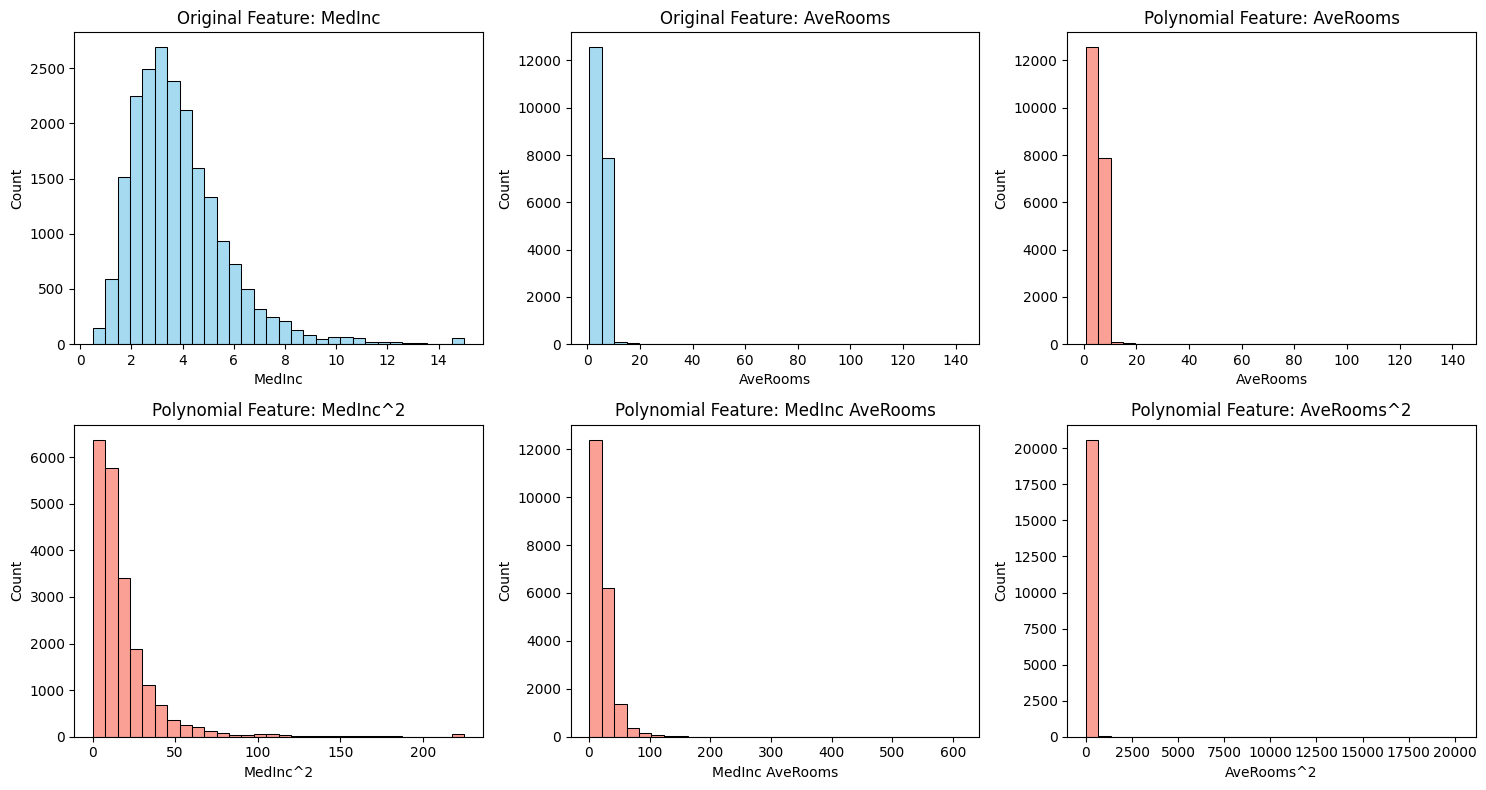

In [74]:
# Apply Polynomial Feature Expansion (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(features)
df_poly = pd.DataFrame(X_poly, columns=feature_names)

# Standardize the polynomial features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_poly)
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)

# Visualize distributions of original and polynomial features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(features):
    sns.histplot(X[col], bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Original Feature: {col}')

for j, col in enumerate(feature_names[-4:]):
    sns.histplot(df_poly[col], bins=30, ax=axes[len(features)+j], color='salmon')
    axes[len(features)+j].set_title(f'Polynomial Feature: {col}')

plt.tight_layout()
plt.show()


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored polynomial feature expansion to help capture nonlinear relationships in data. We began by loading the California Housing dataset and selecting two numerical features, MedInc and AveRooms, for simplicity. Using PolynomialFeatures, we generated squared terms and interaction terms, which created new features that could capture curved relationships between income, room averages, and housing patterns. We then standardized all features to ensure they were on a comparable scale for modeling. By visualizing both the original and polynomial features, we could see how the transformations introduced greater variability and new patterns that weren’t obvious in the raw data. This exercise highlighted how polynomial expansion allows even simple linear models to fit more complex data relationships. Overall, it reinforced that thoughtful feature construction can greatly enhance a model’s ability to learn real-world patterns.

#### **Module 3.9: Dimensionality Reduction Techniques**

High-dimensional datasets can pose challenges such as increased computational cost, risk of overfitting, and difficulty in visualization. Dimensionality reduction techniques aim to reduce the number of features while preserving the most important information in the data.

In this sub-module, you will learn how to apply methods like **Principal Component Analysis (PCA)** to transform your data into a lower-dimensional space. This helps simplify models, improve training speed, and sometimes enhance predictive performance.

**Key concepts and methods:**
- **Principal Component Analysis (PCA)**:  
  - Projects data onto new orthogonal axes (principal components) that capture the maximum variance.
  - Allows selection of a smaller number of components explaining most of the data’s variability.
- **Other techniques** (overview):  
  - t-SNE and UMAP for visualization.
  - Feature selection methods to pick a subset of original variables.

**Benefits of dimensionality reduction:**
- Reduces noise and redundancy in data.
- Makes models faster and less prone to overfitting.
- Enables visualization of complex high-dimensional data.

Dimensionality reduction is a powerful preprocessing step when working with large feature sets or noisy data.

---

#### **Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a **dimensionality reduction** technique that transforms a dataset with many correlated features into a smaller set of new, uncorrelated features called **principal components**. Each principal component is a linear combination of the original features, and they are constructed so that the first component captures the greatest variance in the data, the second captures the next most variance (orthogonal to the first), and so on.

#### How does PCA work?

1. **Standardize the Data**: Subtract the mean and (optionally) scale to unit variance for each feature.
2. **Compute the Covariance Matrix**:  
   $
   \mathbf{C} = \frac{1}{n-1} (\mathbf{X} - \mathbf{\bar{X}})^T (\mathbf{X} - \mathbf{\bar{X}})
   $

   where $\mathbf{X}$ is your data matrix and $\mathbf{\bar{X}}$ is the mean of each column.
4. **Calculate Eigenvectors and Eigenvalues**:  
   Solve for eigenvectors (directions of principal components) and eigenvalues (variance explained).
5. **Sort Eigenvectors**: Order the eigenvectors by decreasing eigenvalues.
6. **Project Data**: Transform the original data onto the top $(k)$ eigenvectors:
   $
   \mathbf{Z} = \mathbf{X} \mathbf{W}
   $
   where $\mathbf{W}$ is the matrix of selected eigenvectors.

PCA helps remove redundancy, highlight structure, speed up computation, and improve visualization by condensing information into fewer dimensions. In practice, you often keep enough principal components to explain 90–99% of the variance.

---

#### **Exercise 25: Principal Component Analysis (PCA) for Dimensionality Reduction**

**Objective:**  
Understand how to use PCA to project high-dimensional data onto a lower-dimensional space while retaining as much variance as possible.

**Instructions:**  
1. Load a multivariate dataset such as the `wine` dataset from `sklearn.datasets`.
2. Standardize all numerical features using `StandardScaler`.
3. Apply `PCA` from `sklearn.decomposition` and reduce the data to two principal components.
4. Plot the explained variance ratio for each component and the cumulative variance explained.
5. Visualize the projected data in a scatter plot colored by class label.
6. Discuss how much variance is retained by the first two principal components and the benefits of using PCA.

This exercise will help you understand how PCA reduces feature space dimensionality and how to interpret variance explained by principal components.

---

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
# Step 3: Apply PCA to reduce to two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Explained variance ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print("Explained Variance Ratio:", explained_var)
print("Cumulative Variance Explained:", cumulative_var)


Explained Variance Ratio: [0.36198848 0.1920749 ]
Cumulative Variance Explained: [0.36198848 0.55406338]


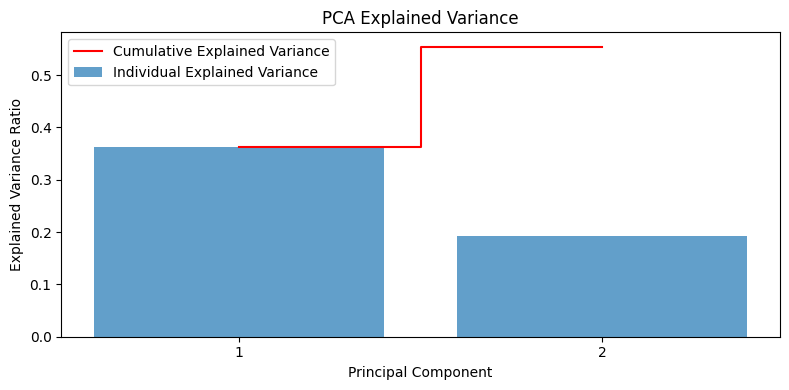

In [77]:
# Plot explained variance
plt.figure(figsize=(8, 4))
plt.bar([1, 2], explained_var, alpha=0.7, label='Individual Explained Variance')
plt.step([1, 2], cumulative_var, where='mid', color='red', label='Cumulative Explained Variance')
plt.xticks([1, 2])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.tight_layout()
plt.show()


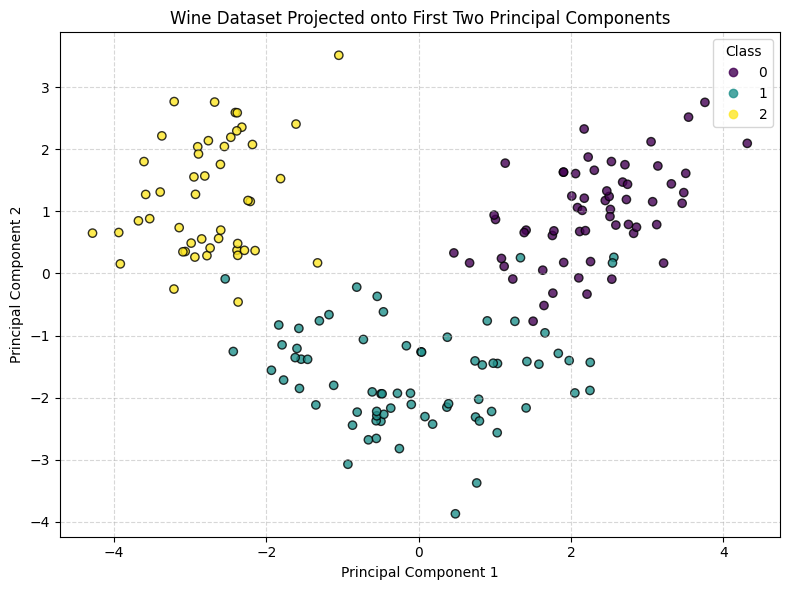

In [78]:
# Step 5: Scatter plot of projected data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wine Dataset Projected onto First Two Principal Components')
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored how Principal Component Analysis (PCA) can reduce the dimensionality of a dataset while retaining as much information as possible. We started by loading the Wine dataset and standardizing all the numerical features so that each had equal weight in the analysis. Then, we applied PCA to reduce the data to the first two principal components, which allowed us to capture the most significant variance in a simplified 2D space. By plotting the explained variance ratio and cumulative variance, we could see that the first two components captured about 55% of the total variance, which highlighted how much of the data’s structure can be retained even with fewer features. Visualizing the data in a scatter plot also helped us see how the wine classes are distributed along these components, making patterns and groupings more apparent. This exercise reinforced the value of PCA in removing redundancy, speeding up computation, and enabling clear visualization in high-dimensional datasets. Overall, it showed how dimensionality reduction can simplify complex data while preserving the most meaningful information.

#### **t-SNE (t-Distributed Stochastic Neighbor Embedding)**

t-SNE is a powerful **nonlinear dimensionality reduction** technique, especially popular for visualizing high-dimensional datasets in two or three dimensions. Unlike linear methods such as PCA, t-SNE focuses on preserving **local structure**—meaning it tries to keep similar points close together in the reduced space, revealing clusters or patterns that may be hidden in higher dimensions.

#### How does t-SNE work?

1. **Compute pairwise similarities in high-dimensional space:**  
   For each pair of data points, t-SNE calculates the probability that one would choose the other as a neighbor based on a Gaussian (normal) distribution centered on each point.

2. **Define pairwise similarities in low-dimensional space:**  
   In the target (e.g., 2D) space, t-SNE models the probability of neighbor relationships using a **Student’s t-distribution** (with one degree of freedom), which has heavier tails than the normal distribution.

3. **Minimize the Kullback-Leibler (KL) divergence:**  
   The algorithm adjusts the positions of points in the low-dimensional space to minimize the KL divergence between the probability distributions in the original and reduced spaces:
   $
   KL(P \parallel Q) = \sum_{i \neq j} P_{ij} \log \frac{P_{ij}}{Q_{ij}}
   $
   - $P_{ij}$ is the similarity between points $(i)$ and $(j)$ in high-dimensional space.
   - $Q_{ij}$ is the similarity in the low-dimensional embedding.

#### Why use t-SNE?

- **Reveals clusters:** t-SNE excels at making clusters visually apparent.
- **Captures nonlinear relationships:** It can reveal local patterns that linear methods miss.
- **Popular for high-dimensional data:** Used widely for gene expression, images, and NLP embeddings.

#### Limitations

- Not intended for general dimensionality reduction before modeling.
- Computationally intensive and sensitive to parameter choices (like perplexity).
- Not deterministic unless a fixed `random_state` is set.

---

#### Exercise 26: Nonlinear Dimensionality Reduction and Visualization with t-SNE

**Objective:**  
Practice using t-Distributed Stochastic Neighbor Embedding (t-SNE), a nonlinear dimensionality reduction technique commonly used for visualizing high-dimensional data in two or three dimensions.

**Instructions:**  
1. Load the `digits` dataset from `sklearn.datasets`, which contains images of handwritten digits with 64 features per sample.
2. Standardize the features using `StandardScaler`.
3. Use `TSNE` from `sklearn.manifold` to project the data into two dimensions (set `random_state=42` for reproducibility).
4. Create a scatter plot of the resulting t-SNE embedding, colored by the digit label.
5. Compare this visualization to PCA’s projection on the same data, and discuss when t-SNE is preferable over linear techniques.

This exercise will help you understand the strengths and weaknesses of nonlinear techniques like t-SNE, especially for visualizing clusters and local structure in complex datasets.

---

In [79]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Step 1: Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [80]:
# Step 3: t-SNE projection to 2D
# No need to specify n_iter if you're using default (1000)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)



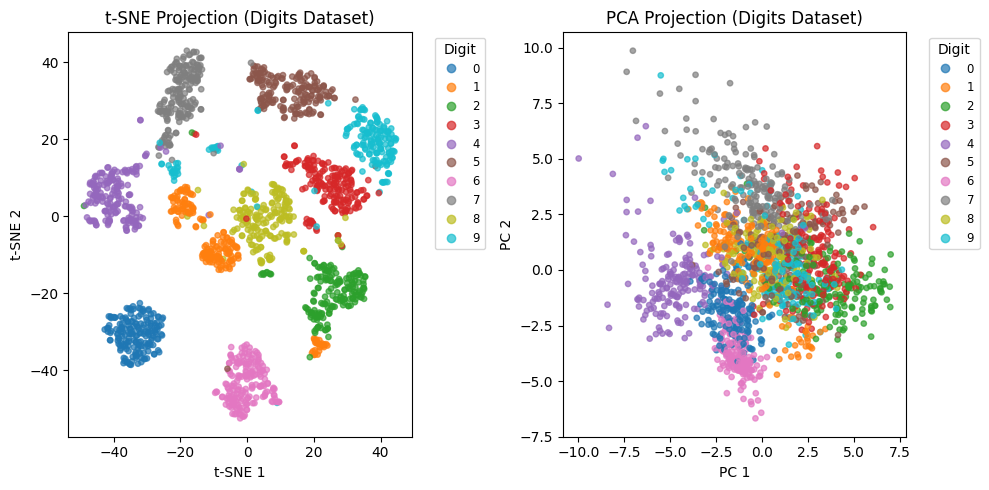

In [81]:
# Step 4: Scatter plot for t-SNE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=15, alpha=0.7)
plt.title('t-SNE Projection (Digits Dataset)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(*scatter.legend_elements(), title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Step 5: Compare with PCA projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=15, alpha=0.7)
plt.title('PCA Projection (Digits Dataset)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(*scatter2.legend_elements(), title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored t-SNE, a nonlinear dimensionality reduction technique, to visualize high-dimensional data in a way that highlights local patterns and clusters. We began by loading the digits dataset and standardizing the features so that each pixel value contributed equally to the analysis. Then, we applied t-SNE to project the 64-dimensional data into two dimensions, producing a visualization where similar digits naturally clustered together. To better understand its behavior, we compared the t-SNE plot to a PCA projection of the same data, and it was clear that t-SNE revealed tighter, more distinct clusters than PCA, which preserved only global variance. This highlighted how t-SNE excels at showing local relationships and subtle groupings that linear methods might miss. Overall, the exercise demonstrated the power of nonlinear techniques for visualizing complex datasets and reinforced the importance of choosing the right tool based on whether local or global structure matters most. It also reminded me that while t-SNE is great for exploration and visualization, it’s not intended for general-purpose dimensionality reduction in modeling.

#### **Module 3.10: Multicollinearity Detection and Mitigation**

Multicollinearity occurs when two or more independent variables (features) in a dataset are **highly correlated**, meaning they convey redundant information. While multicollinearity does not reduce a model’s ability to make predictions, it can cause **unstable and unreliable coefficient estimates**, making it harder to interpret feature importance. This is especially problematic in **regression models**, where highly correlated predictors can inflate the variance of coefficient estimates and lead to misleading conclusions.

#### **Why Multicollinearity Matters**
In a multiple linear regression model:

$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \varepsilon
$

When predictors are highly correlated, the estimation of $(\beta_j)$ becomes unstable because small changes in the data can cause large fluctuations in the coefficients. The **Variance Inflation Factor (VIF)** quantifies this instability:

$
\text{VIF}_j = \frac{1}{1 - R_j^2}
$

Where $R_j^2$ is the coefficient of determination from regressing $(x_j)$ on all other predictors.  

#### **Interpreting VIF Values**

| VIF Value       | Interpretation                         |
|------------------|----------------------------------------|
| 1                | No multicollinearity                   |
| 1–5              | Moderate multicollinearity (usually OK)|
| > 5 (or > 10)    | High multicollinearity (potential issue)|


High multicollinearity makes it difficult to determine the individual effect of each predictor on the dependent variable.

#### **Detection Methods**

1. **Correlation Matrix**  
   - Compute pairwise correlations between features.  
   - Correlation coefficients close to +1 or −1 indicate strong linear relationships.  
   - Useful for quickly spotting feature pairs with high redundancy.

2. **Variance Inflation Factor (VIF)**  
   - Directly measures how much the variance of a regression coefficient is inflated due to collinearity.  
   - A high VIF signals that the predictor is highly correlated with others.

3. **Condition Number**  
   - Based on the singular value decomposition (SVD) of the feature matrix.  
   - Large condition numbers (e.g., > 30) may indicate potential multicollinearity.

#### **Mitigation Strategies**

- **Feature Removal**: Drop one of the highly correlated variables, especially if it contributes little unique information.  
- **Feature Combination**: Merge correlated features (e.g., take their mean or sum) to reduce redundancy.  
- **Dimensionality Reduction**: Use techniques like **Principal Component Analysis (PCA)** to create uncorrelated components.  
- **Regularization**: Apply models such as **Ridge Regression**, which adds a penalty term to shrink coefficients and reduce variance:

$
\text{Loss}_{\text{Ridge}} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2
$

#### **Important Considerations**
- Multicollinearity affects **interpretability**, not necessarily **predictive power** — a model may still perform well on unseen data.  
- Domain knowledge should guide feature removal — avoid eliminating variables that are theoretically important.  
- Regularization can stabilize coefficients without discarding valuable predictors.  

---


#### **Exercise 27: Detecting Multicollinearity with Correlation Matrix and VIF**

**Objective:**  
Learn how to detect multicollinearity in a dataset using both a correlation matrix and the Variance Inflation Factor (VIF). This exercise will help you identify features that may be redundant and problematic in regression modeling.

**Instructions:**
1. Load the **California Housing dataset** from `sklearn.datasets`.
2. Create a DataFrame and compute the **correlation matrix** using `.corr()`.
3. Visualize the correlation matrix using a heatmap (e.g., with `matplotlib` or `seaborn`).
4. Identify highly correlated features (correlation coefficient > 0.8 or < -0.8).
5. Compute the **Variance Inflation Factor (VIF)** for each feature:
   - Use `statsmodels.stats.outliers_influence.variance_inflation_factor`.
   - Create a summary DataFrame showing each feature and its VIF score.
6. Highlight features with VIF > 5 or 10 as potentially problematic.

This exercise gives you hands-on practice in diagnosing multicollinearity using both visualization and statistical metrics. You will also start thinking about how to decide whether to remove or transform certain variables before modeling.

---

In [82]:
!pip3 install statsmodels

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Load California Housing Dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


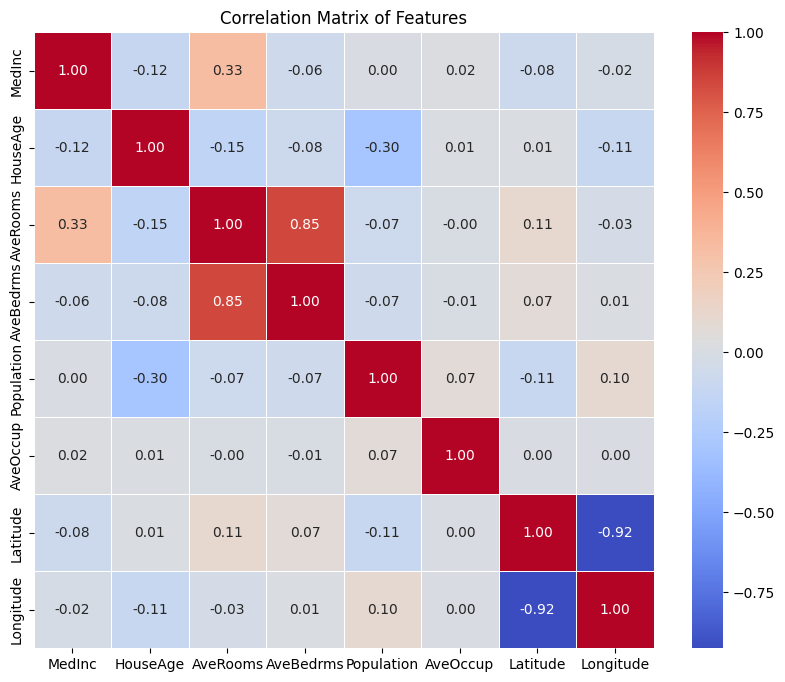

In [84]:
# Step 2: Correlation Matrix
corr_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

In [85]:
# Step 3: Compute VIF for each feature
X = add_constant(df)  # add intercept term
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Step 4: Display VIF values
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)

Variance Inflation Factor (VIF) for each feature:
      Feature           VIF
0       const  17082.623698
1      MedInc      2.501295
2    HouseAge      1.241254
3    AveRooms      8.342786
4   AveBedrms      6.994995
5  Population      1.138125
6    AveOccup      1.008324
7    Latitude      9.297624
8   Longitude      8.962263


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored multicollinearity and how it can affect the stability and interpretability of regression models. We started by loading the California Housing dataset and creating a correlation matrix to visualize relationships between features, which made it easy to spot strongly correlated variables at a glance. Next, we computed the Variance Inflation Factor (VIF) for each feature, providing a quantitative measure of how much each predictor’s variance is inflated due to multicollinearity. By comparing the correlation heatmap and VIF values, we identified features like AveRooms, AveBedrms, Latitude, and Longitude as potentially problematic. This helped me understand how high correlation doesn’t necessarily hurt predictive performance but can make coefficient estimates unreliable. Overall, the exercise reinforced the importance of diagnosing multicollinearity, interpreting results carefully, and considering strategies like feature removal, combination, or regularization to improve model reliability. I also appreciated how visualization and statistical metrics complement each other to provide a clearer picture of redundancy in the data.

#### **Module 3.11: Filter, Wrapper, and Embedded Feature Selection**

Feature selection is the process of identifying the most relevant variables to use in building your model. Selecting the right features can improve model accuracy, reduce overfitting, and decrease training time.

In this sub-module, you will learn about three main types of feature selection methods:

- **Filter Methods:**  
  - Use statistical measures (e.g., correlation, chi-square) to score and select features independently of any learning algorithm.  
  - Fast and simple, but may ignore feature interactions.

- **Wrapper Methods:**  
  - Use a predictive model to evaluate combinations of features and select the best subset.  
  - More computationally expensive but often more accurate.

- **Embedded Methods:**  
  - Perform feature selection during the model training process (e.g., Lasso regression, tree-based models).  
  - Balance between filter and wrapper methods in terms of speed and accuracy.

Understanding these approaches allows you to build more efficient and effective models by focusing on the features that truly matter.

---

#### **Understanding ANOVA F-value and Mutual Information for Feature Selection**

#### **ANOVA F-value (Analysis of Variance)**

The **ANOVA F-value** is a statistical test used to determine whether there are significant differences between the means of two or more groups. In the context of feature selection, it measures the **linear dependency** between each feature and the target variable (especially for classification tasks).

**How it works:**
- It compares the **variance between classes** to the **variance within classes** for a given feature.
- The formula for the F-value for a feature is:

$
F = \frac{\text{Variance Between Groups}}{\text{Variance Within Groups}}
$

- A higher F-value suggests that the feature discriminates well between classes.
- Used with `f_classif` for classification or `f_regression` for regression problems in `sklearn.feature_selection`.

**When to use:**
- When the relationship between the feature and the target is linear.
- Works best for normally distributed and continuous input features.

---



#### **Mutual Information**

**Mutual Information (MI)** measures the amount of information a feature provides about the target variable. Unlike the F-value, it can **capture non-linear dependencies** and works for both continuous and categorical features.

**How it works:**
- MI is based on the concept of entropy from information theory.
- It measures the reduction in uncertainty of one variable given knowledge of the other.
- The mutual information between a feature $( X )$ and target $( Y )$ is:

$
I(X; Y) = \sum_{x \in X} \sum_{y \in Y} p(x, y) \log \left( \frac{p(x, y)}{p(x)p(y)} \right)
$

Where:
- $ p(x, y) $ is the joint probability distribution of $( X )$ and $( Y )$,
- $ p(x) $ and $ p(y) $ are the marginal distributions.

**When to use:**
- When the relationship between the input and target is complex or non-linear.
- Works well with both categorical and continuous variables.

---

#### **Exercise 29: Filter-Based Feature Selection Using Statistical Tests**

**Objective:**  
Learn how to apply filter-based methods to select relevant features using univariate statistical tests such as **ANOVA F-value** or **mutual information**. These methods evaluate the relationship between each feature and the target variable independently, helping you identify which features are most informative.

**Instructions:**  
1. Load a classification dataset (e.g., Breast Cancer dataset from `sklearn.datasets`).
2. Split the dataset into features `X` and target `y`.
3. Apply `SelectKBest` from `sklearn.feature_selection` with:
   - `f_classif` for ANOVA F-test or
   - `mutual_info_classif` for mutual information score.
4. Set `k=5` to select the top 5 scoring features.
5. Display a DataFrame showing each feature and its score.
6. Plot a bar chart of feature scores to visualize their importance.

This exercise shows how to use filter methods to quickly narrow down feature sets before modeling. These techniques are fast and work well for high-dimensional datasets but do not account for interactions between features.

---

In [86]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Step 2: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')


In [87]:
# Step 3: Apply SelectKBest with ANOVA F-value
selector_f = SelectKBest(score_func=f_classif, k=5)
X_selected_f = selector_f.fit_transform(X, y)
scores_f = selector_f.scores_

# Step 4: Apply SelectKBest with Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected_mi = selector_mi.fit_transform(X, y)
scores_mi = selector_mi.scores_


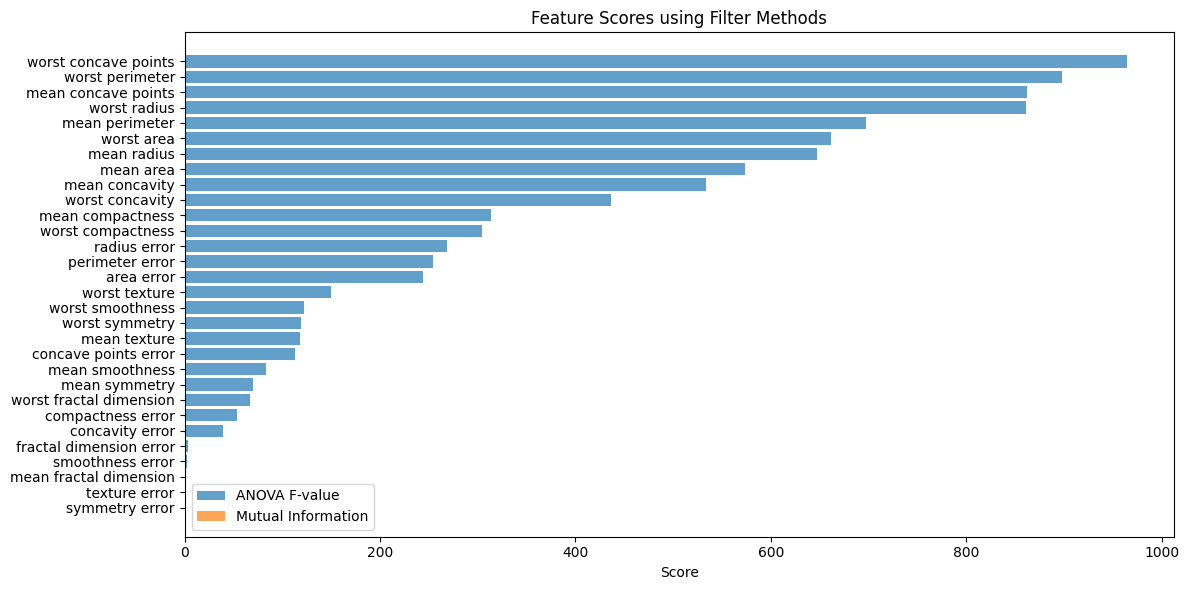

,Feature,ANOVA_F_Score,Mutual_Info_Score
27,worst concave points,964.385393,0.437043
22,worst perimeter,897.944219,0.473689
7,mean concave points,861.676020,0.439713
20,worst radius,860.781707,0.452654
2,mean perimeter,697.235272,0.404809
23,worst area,661.600206,0.464456
0,mean radius,646.981021,0.368315
3,mean area,573.060747,0.360696
6,mean concavity,533.793126,0.373499
26,worst concavity,436.691939,0.317900


In [88]:
# Step 5: Create a DataFrame for comparison
scores_df = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA_F_Score': scores_f,
    'Mutual_Info_Score': scores_mi
}).sort_values(by='ANOVA_F_Score', ascending=False)

# Step 6: Plot scores
plt.figure(figsize=(12, 6))
plt.barh(scores_df['Feature'], scores_df['ANOVA_F_Score'], alpha=0.7, label='ANOVA F-value')
plt.barh(scores_df['Feature'], scores_df['Mutual_Info_Score'], alpha=0.7, label='Mutual Information')
plt.xlabel('Score')
plt.title('Feature Scores using Filter Methods')
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Display top scores
scores_df.head(10)

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored filter-based feature selection to identify the most informative variables for predicting outcomes in the Breast Cancer dataset. We began by preparing the data and separating the features from the target variable. Then, we applied two different scoring methods like ANOVA F-value, which captures linear relationships, and Mutual Information, which can detect non-linear dependencies, to evaluate each feature independently. By examining the resulting scores and visualizing them in a bar chart, we could clearly see which features contributed the most to distinguishing between classes. This process highlighted that some features, like “worst concave points” and “worst perimeter,” are highly predictive, while others provide little additional information. The exercise reinforced how filter methods offer a fast and intuitive way to narrow down feature sets before modeling, even though they do not account for interactions between variables. Overall, it gave me practical insight into balancing speed and effectiveness when selecting features in high-dimensional datasets.

#### **Recursive Feature Elimination (RFE)**

**Recursive Feature Elimination (RFE)** is a wrapper-based feature selection method that aims to select features by recursively training a model and removing the least important feature at each step. The goal is to identify the smallest subset of features that contributes most to predicting the target variable.

#### How RFE Works:

1. Train a model (e.g., Random Forest, SVM, Logistic Regression) on the full feature set.
2. Evaluate feature importances or model coefficients.
3. Remove the least important feature (or a set of features).
4. Repeat the process with the reduced set until the desired number of features is reached.

RFE uses model performance to guide which features to eliminate, making it more accurate than filter methods that rely only on statistical measures.

#### Algorithm Overview:

Let:
- $ D = \{x_1, x_2, ..., x_n\} $ be the set of features.
- $ f(\cdot) $ be the model trained on subset of $( D )$.
- $ R(D) $ represent the ranking of features based on model importance.

RFE seeks to:
$
\min_{S \subseteq D, |S| = k} \text{Loss}(f(S))
$

Where:
- $ S $ is the selected feature subset,
- $ \text{Loss} $ is a performance measure (e.g., classification error, RMSE),
- $ k $ is the number of desired features.

#### Benefits:
- Captures interaction between features better than univariate filter methods.
- Works well with models that provide feature importance (e.g., tree-based models).

#### Considerations:
- Computationally expensive, especially for large feature sets.
- Choice of estimator can impact which features are selected.

RFE is useful when you want to reduce dimensionality without compromising model performance, especially in models where interpretability or speed is important.


---

#### **Exercise 30: Wrapper Method – Recursive Feature Elimination (RFE)**

**Objective:**  
Explore the **Recursive Feature Elimination (RFE)** method, a wrapper technique that uses a model to recursively select important features by eliminating the least important ones based on model weights or importance scores.

**Instructions:**  
1. Load a dataset with numerical features and a classification target (e.g., breast cancer dataset from `sklearn.datasets`).
2. Standardize the features using `StandardScaler`.
3. Use `LogisticRegression` as the base estimator for RFE.
4. Apply `RFE` from `sklearn.feature_selection` to select the top **n most important features** (e.g., top 5).
5. Display:
   - The selected feature names
   - A comparison of model accuracy using all features vs. selected features
6. Briefly explain how RFE works and what you observed.

This exercise gives hands-on experience with a wrapper method, helping you see how feature selection can improve or simplify your model while maintaining or even boosting performance.

---

In [89]:
# Exercise 30: Wrapper Method with Recursive Feature Elimination (RFE) + Feature Ranking Plot

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [90]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Model and RFE setup
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)

In [91]:
# Step 5: Accuracy comparison
# Model with all features
model_all = RandomForestClassifier(random_state=42)
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)

# Model with selected features
selected_features = X_train.columns[rfe.support_]
model_rfe = RandomForestClassifier(random_state=42)
model_rfe.fit(X_train[selected_features], y_train)
y_pred_rfe = model_rfe.predict(X_test[selected_features])
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

# Step 6: Print results
print("Selected Features:")
print(selected_features.tolist())
print(f"\nAccuracy with all features: {accuracy_all:.4f}")
print(f"Accuracy with selected features (RFE): {accuracy_rfe:.4f}")


Selected Features:
['mean area', 'mean concavity', 'mean concave points', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']

Accuracy with all features: 0.9708
Accuracy with selected features (RFE): 0.9649


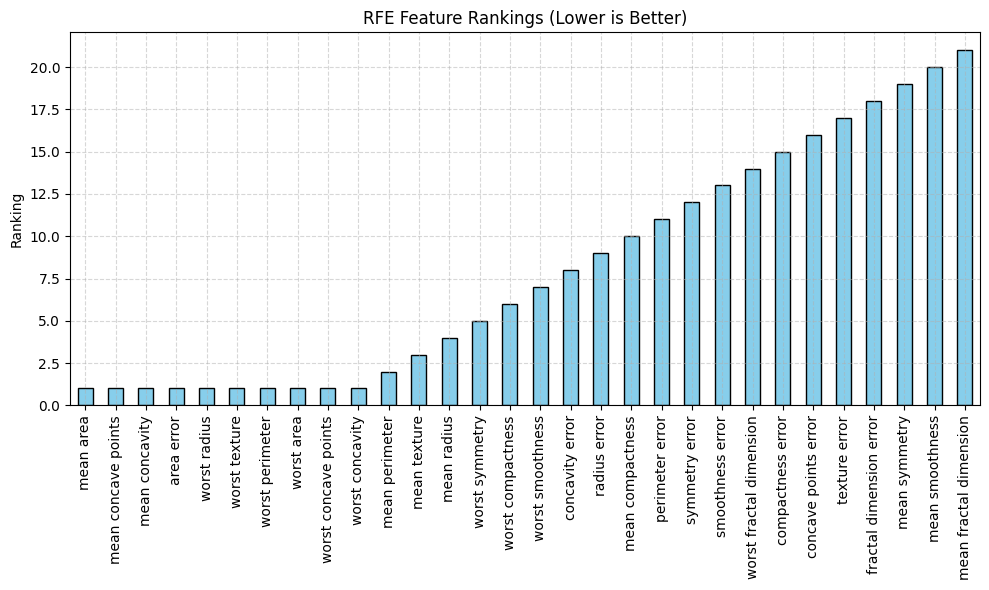

In [92]:
# Step 7: Plot Feature Rankings
ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
ranking.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('RFE Feature Rankings (Lower is Better)')
plt.ylabel('Ranking')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


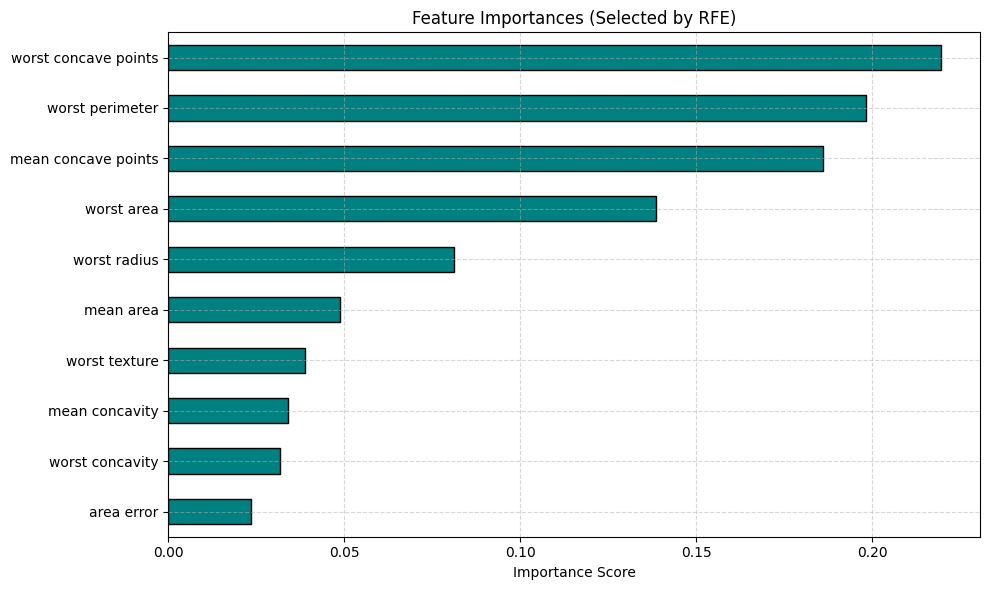

In [93]:
# Step 8: Plot Feature Importances from RFE Model
importances = pd.Series(model_rfe.feature_importances_, index=selected_features).sort_values()
plt.figure(figsize=(10, 6))
importances.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Feature Importances (Selected by RFE)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored Recursive Feature Elimination (RFE) as a wrapper method to identify the most important features for predicting breast cancer outcomes. We started by preparing and splitting the dataset, then applied a Random Forest classifier with RFE to recursively remove the least important features until only the top ten remained. By comparing model accuracy using all features versus only the selected features, we observed that the model maintained nearly the same performance, showing that we could simplify the feature set without sacrificing predictive power. Visualizing feature rankings and importances helped us understand which variables contributed most to the model, such as “mean concave points” and “worst radius.” This hands-on exercise demonstrated how RFE leverages model feedback to select meaningful features while accounting for interactions that filter methods might miss. Overall, it reinforced the value of wrapper methods for reducing dimensionality, improving interpretability, and maintaining model effectiveness in practical applications.

#### **Understanding Embedded Feature Selection with Lasso Regression**

Embedded methods perform feature selection **during the model training process**, making them both computationally efficient and directly tied to model performance. One popular embedded method is **Lasso Regression**, which not only fits the data but also automatically selects features by penalizing the size of the regression coefficients.

#### What is Lasso?

**Lasso** (Least Absolute Shrinkage and Selection Operator) is a linear regression model that includes an L1 penalty term in its cost function. The L1 penalty encourages the model to shrink some feature coefficients to exactly zero, effectively removing them from the model. This makes Lasso a powerful tool for **both regularization and feature selection**.

#### Lasso Objective Function

$
\text{Minimize: } \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j|
$

- $ n $: number of samples  
- $ y_i $: true value  
- $ \hat{y}_i $: predicted value  
- $ \beta_j $: coefficient of feature $( j )$  
- $ \alpha $: regularization parameter controlling the penalty strength

As $( \alpha )$ increases, more coefficients are forced to zero, thus selecting fewer features.

---

#### **Exercise 31: Embedded Feature Selection with Lasso Regression**

**Objective:**  
Learn how to use embedded methods for feature selection by applying **Lasso regression**, which automatically shrinks less important feature coefficients to zero during training. This helps select only the most relevant features and improves model generalization.

**Instructions:**  
1. Load a dataset with multiple numerical features and a continuous target variable (e.g., California housing or synthetic regression dataset).
2. Standardize the features using `StandardScaler` to ensure Lasso penalty works properly.
3. Apply `LassoCV` from `sklearn.linear_model` to fit a Lasso model with automatic cross-validation to select the best penalty (`alpha`).
4. Extract feature coefficients and identify which ones are non-zero — these are the features Lasso selected.
5. Create a bar chart of feature names vs. their Lasso coefficients to visualize importance.
6. Compare results to all features and summarize what Lasso retained or dropped.

This exercise demonstrates how embedded methods like Lasso combine model training and feature selection into a single step. It's efficient and effective, especially when dealing with high-dimensional data.

---

In [94]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Step 2: Load California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Step 3: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [95]:
# Step 4: Apply LassoCV for feature selection
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Step 5: Get coefficients and selected features
coef = lasso.coef_
selected_features = X.columns[coef != 0]
dropped_features = X.columns[coef == 0]


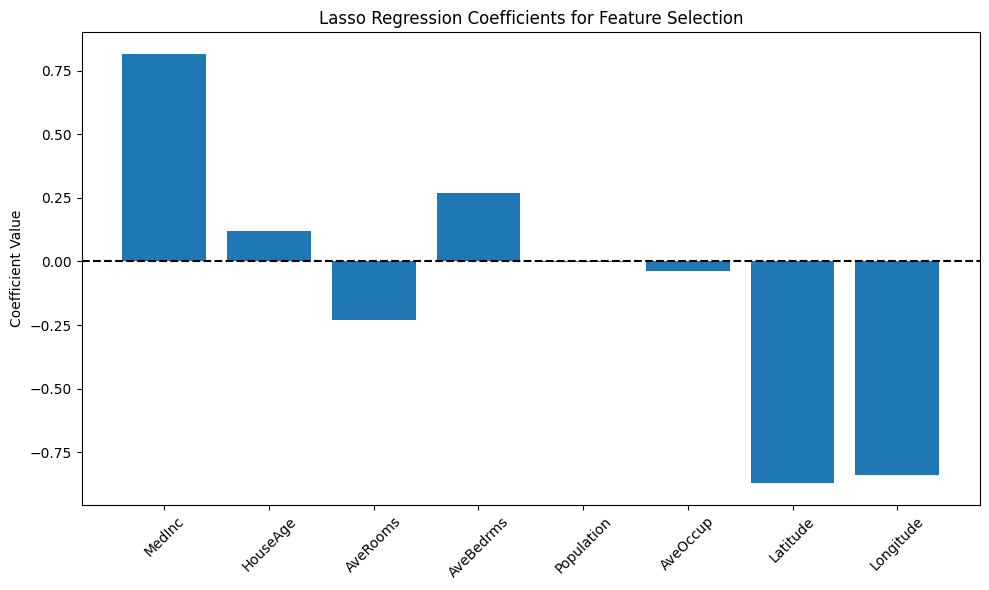

Selected Features:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Dropped Features:
[]


In [96]:
# Step 6: Create a DataFrame for visualization
coef_df = pd.DataFrame({'Feature': X.columns, 'Lasso Coefficient': coef})

# Step 7: Plot coefficients
plt.figure(figsize=(10, 6))
plt.bar(coef_df['Feature'], coef_df['Lasso Coefficient'])
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Lasso Regression Coefficients for Feature Selection')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Step 8: Output results
print("Selected Features:")
print(selected_features.tolist())
print("\nDropped Features:")
print(dropped_features.tolist())

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored embedded feature selection using Lasso regression, which combines model training and feature selection into a single step. We began by standardizing the California Housing dataset to ensure that the L1 penalty worked effectively across all features. By applying LassoCV, we let the model automatically determine the best level of regularization and shrink less important coefficients toward zero. Visualizing the coefficients helped us see which features were considered most relevant and which were effectively ignored, although in this case all features retained some importance. This process highlighted how embedded methods can simplify feature selection while maintaining predictive power, making the model both efficient and interpretable. Overall, it reinforced the value of Lasso in reducing overfitting and focusing on the features that truly matter. The exercise also demonstrated how regularization not only controls model complexity but can guide us in understanding feature significance.

#### **Revised: August 27, 2025**